In [0]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

In [0]:
#To Ignore The Warnings.
warnings.filterwarnings('ignore') 
plt.rcParams.update({'figure.max_open_warning': 0}) 

In [0]:
train = pd.read_csv("https://dataset-upload.s3-ap-southeast-1.amazonaws.com/train.csv")
test = pd.read_csv("https://dataset-upload.s3-ap-southeast-1.amazonaws.com/test.csv")

# Analysing Train Data

In [65]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [66]:
train.shape

(200000, 202)

In [67]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [68]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

**Missing Value Analysis**

In [69]:
(train.isnull().sum()).sum()              # No missing value found in  entire dataset

0

**Check Balance of Dataset Target Variable**

In [70]:
train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

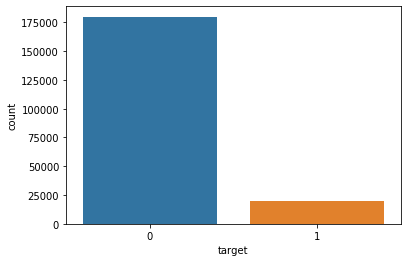

In [71]:
sns.countplot(x= "target", data = train)

Dataset is highly imbalance

# Preprocessing Train Data

In [0]:
df_train = train.copy(deep=True)
del df_train["ID_code"]                               #Remove the ID_code column

In [73]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,...,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,...,29.4846,5.8683,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,11.0752,-5.5937,9.4878,-14.9100,9.4245,22.5441,-4.8622,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,-0.3249,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,-1.7395,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,-2.9029,5.8463,6.1439,-11.1025,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,10.8917,...,13.2070,5.8442,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.4013,-4.2935,9.3908,-13.2648,3.1545,23.0866,-5.3000,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,2.3061,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,-0.4299,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,-0.9059,5.9070,2.8407,-15.2398,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,9.1738,...,31.8833,5.9684,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.6961,-3.7546,8.4117,1.8986,7.2601,-0.4639,-0.0498,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,-9.4458,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,-3.0680,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,-3.3423,5.9015,7.9352,-3.1582,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,19.3038,...,33.5107,5.6953,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.1743,-7.6938,9.7685,4.8910,12.2198,11.8503,-7.8931,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


**Check if variables are Numerical or Categorical**

In [74]:
for i in df_train:
    print(i,":",df_train[i].nunique())

target : 2
var_0 : 94672
var_1 : 108932
var_2 : 86555
var_3 : 74597
var_4 : 63515
var_5 : 141029
var_6 : 38599
var_7 : 103063
var_8 : 98617
var_9 : 49417
var_10 : 128764
var_11 : 130193
var_12 : 9561
var_13 : 115181
var_14 : 79122
var_15 : 19810
var_16 : 86918
var_17 : 137823
var_18 : 139515
var_19 : 144180
var_20 : 127764
var_21 : 140062
var_22 : 90660
var_23 : 24913
var_24 : 105101
var_25 : 14853
var_26 : 127089
var_27 : 60185
var_28 : 35859
var_29 : 88339
var_30 : 145977
var_31 : 77388
var_32 : 85964
var_33 : 112239
var_34 : 25164
var_35 : 122384
var_36 : 96404
var_37 : 79040
var_38 : 115366
var_39 : 112674
var_40 : 141878
var_41 : 131896
var_42 : 31592
var_43 : 15188
var_44 : 127702
var_45 : 169968
var_46 : 93450
var_47 : 154781
var_48 : 152039
var_49 : 140641
var_50 : 32308
var_51 : 143455
var_52 : 121313
var_53 : 33460
var_54 : 144776
var_55 : 128077
var_56 : 103045
var_57 : 35545
var_58 : 113907
var_59 : 37744
var_60 : 113763
var_61 : 159369
var_62 : 74777
var_63 : 97098
var_64 

As we can see, all variables are Numerical except the target one.

In [0]:
#Separating Target for Data Preprocessing
target = df_train["target"]
df_train = df_train.drop(["target"], axis = 1)

**Outlier Analysis Using Boxplot**

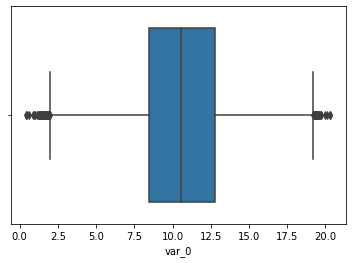

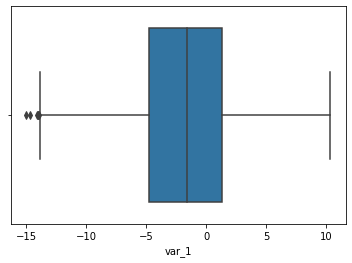

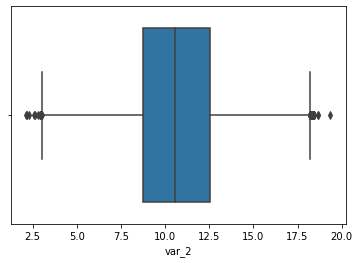

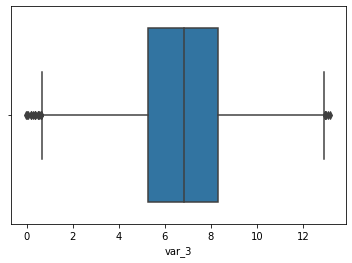

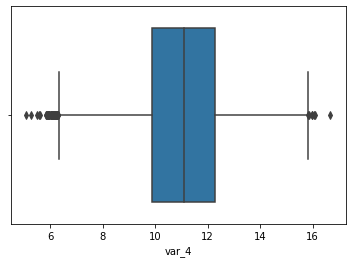

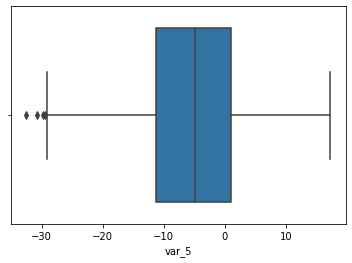

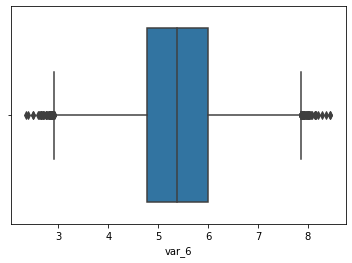

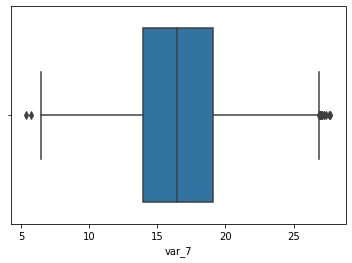

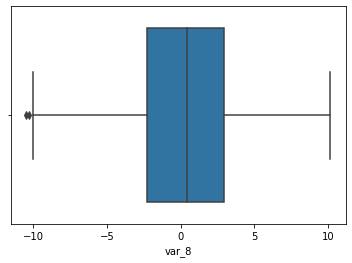

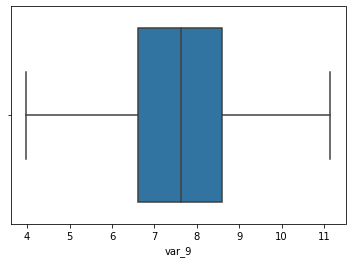

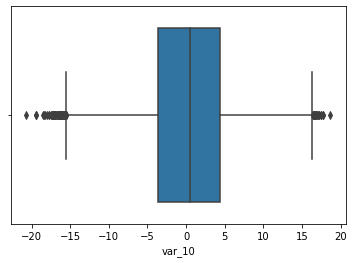

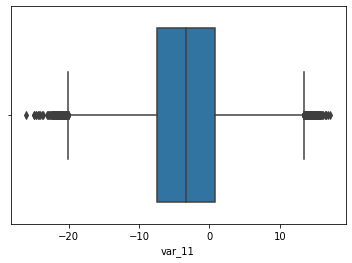

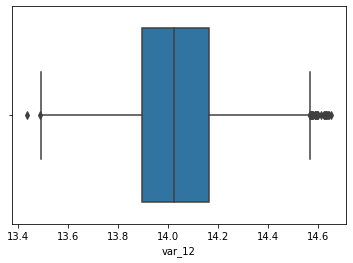

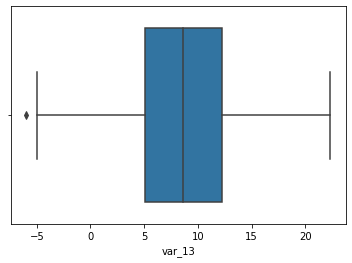

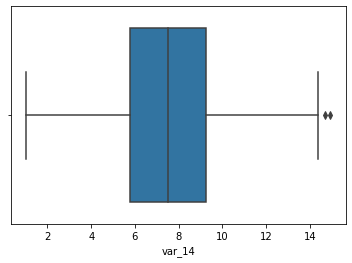

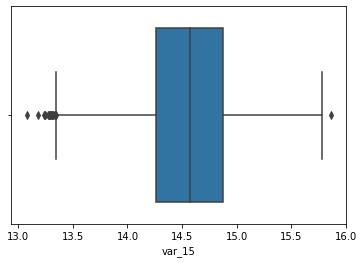

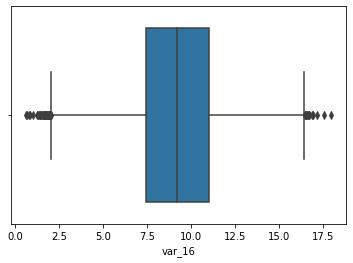

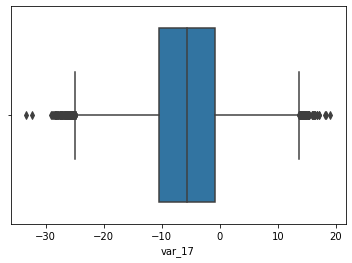

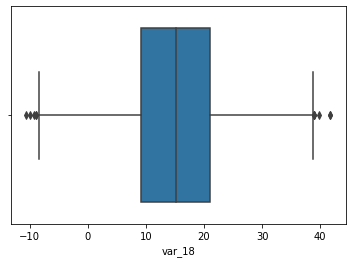

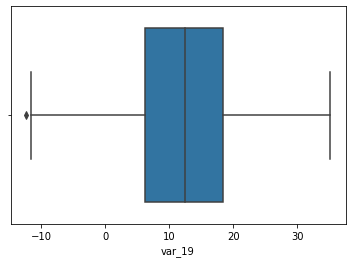

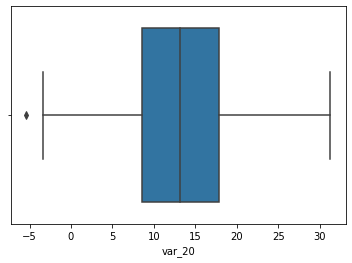

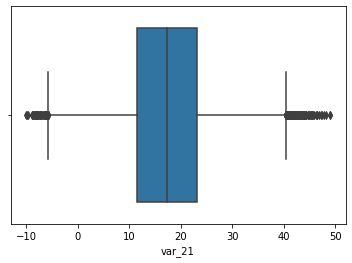

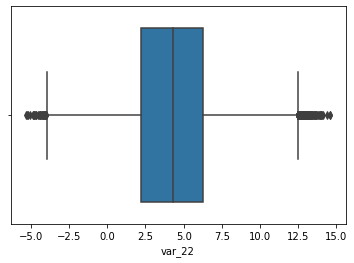

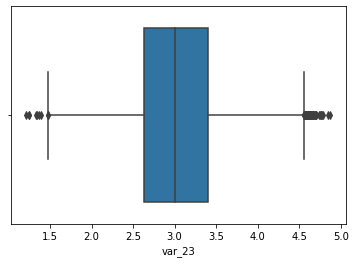

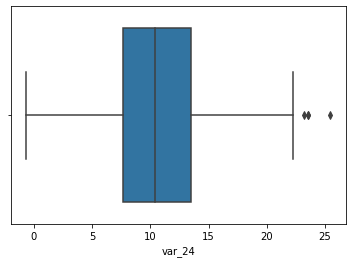

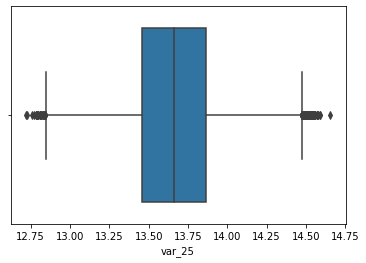

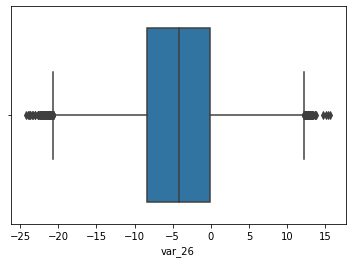

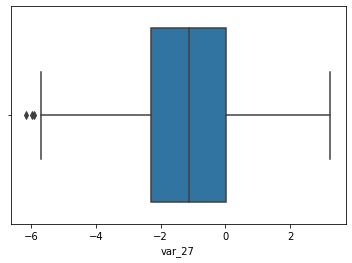

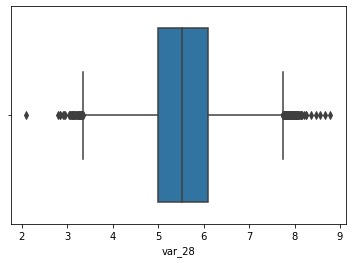

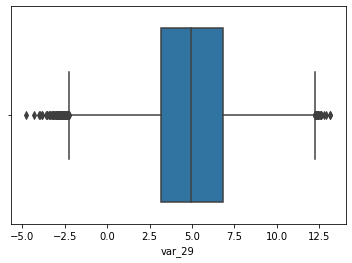

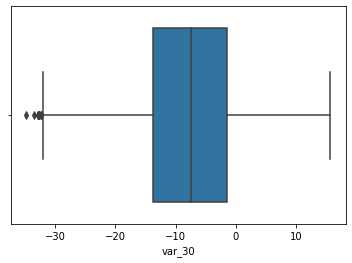

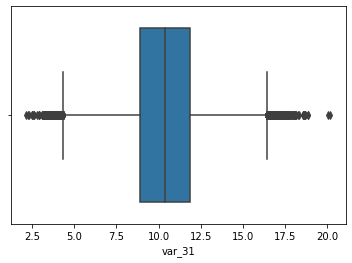

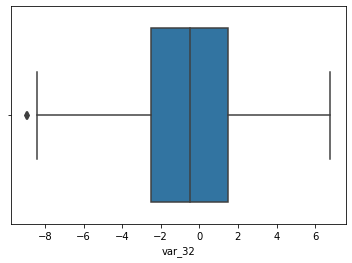

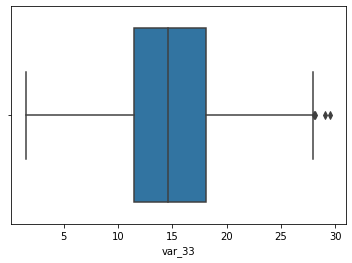

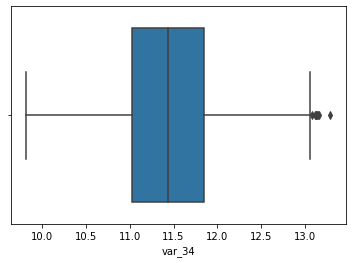

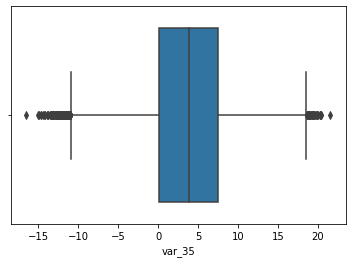

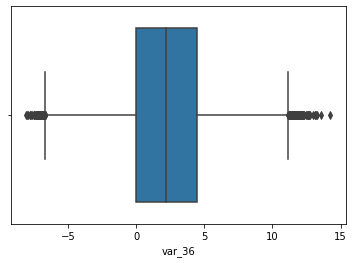

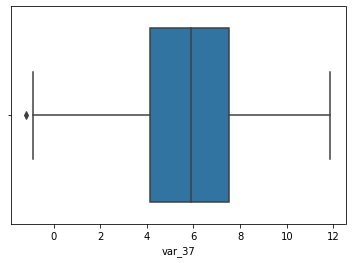

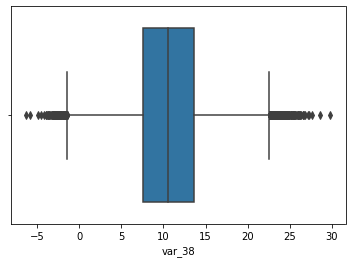

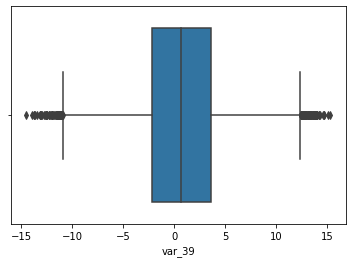

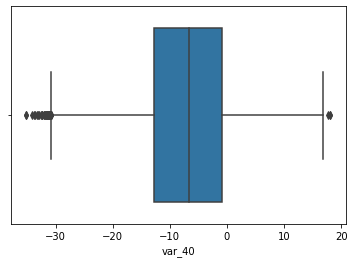

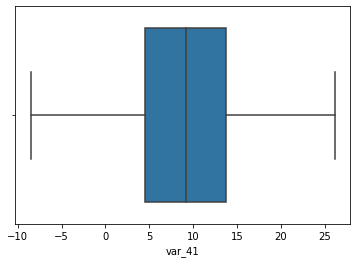

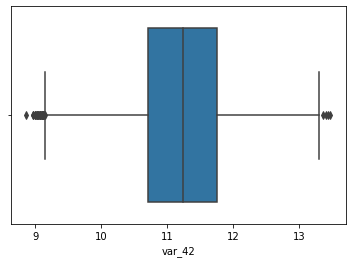

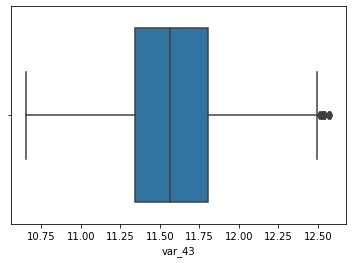

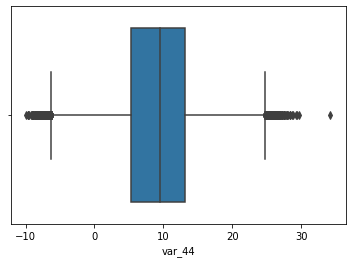

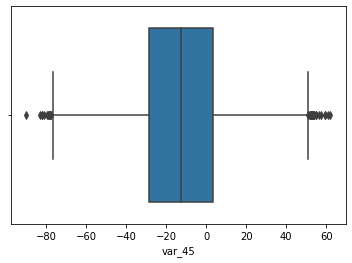

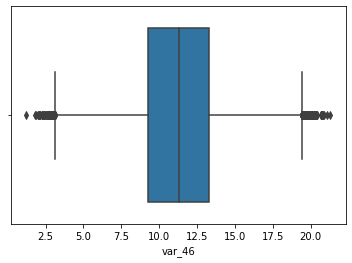

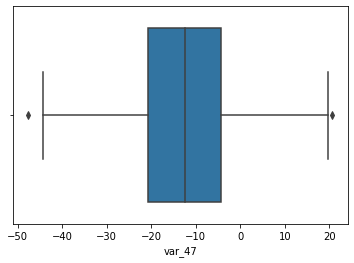

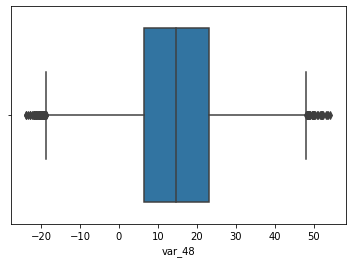

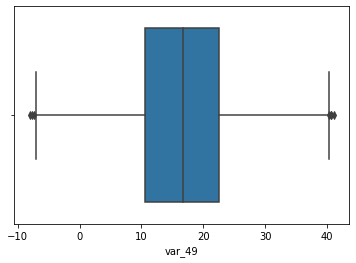

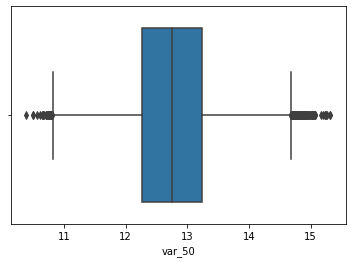

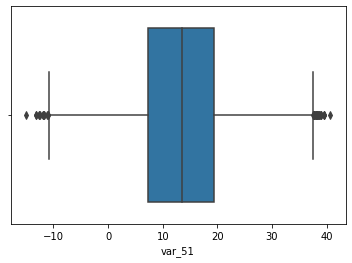

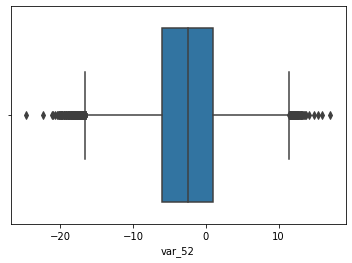

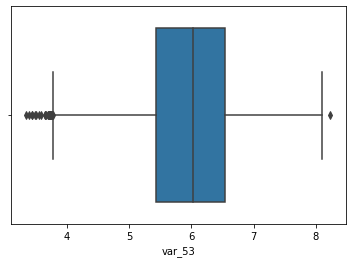

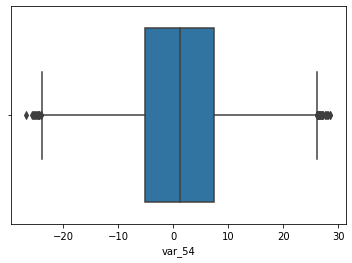

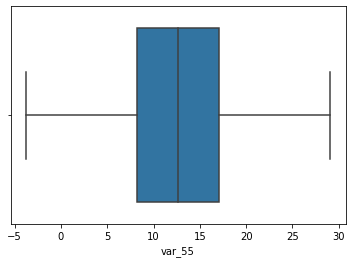

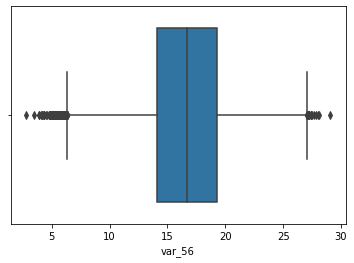

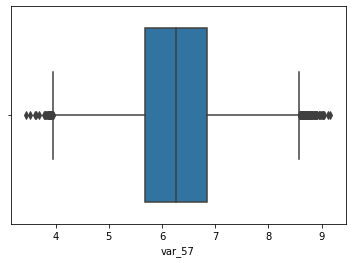

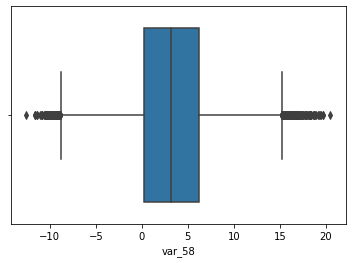

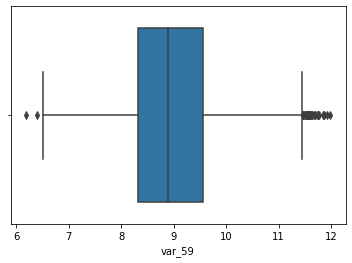

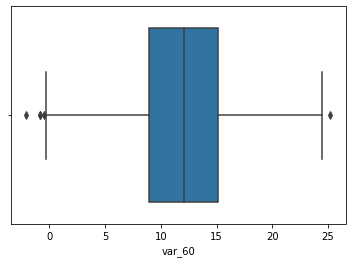

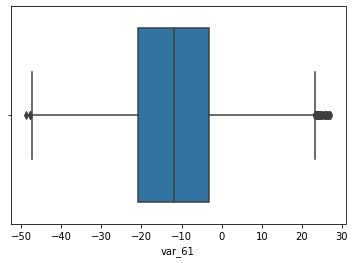

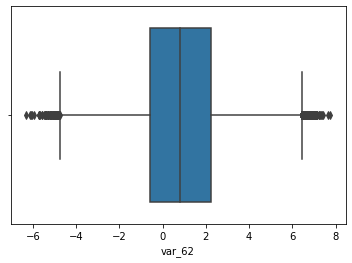

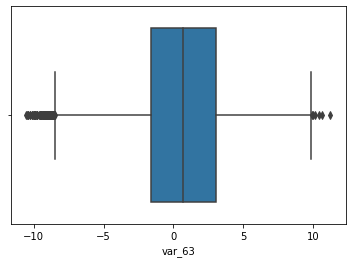

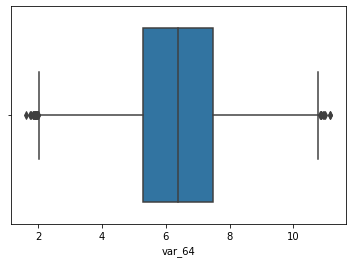

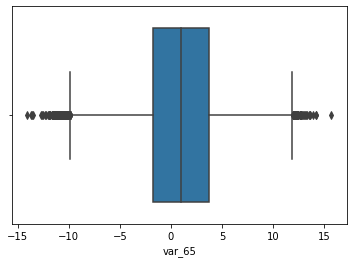

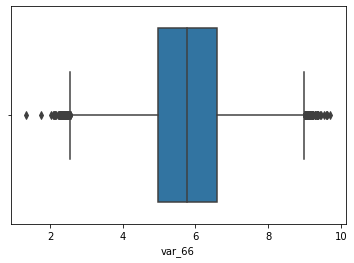

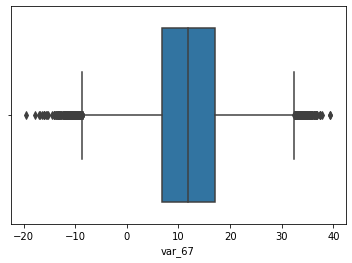

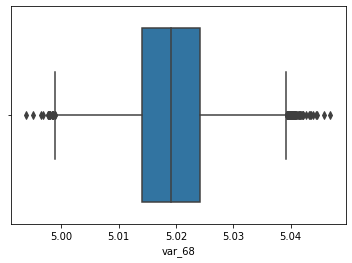

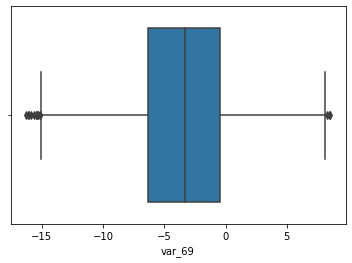

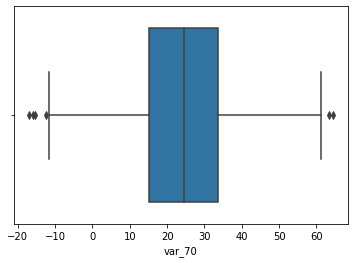

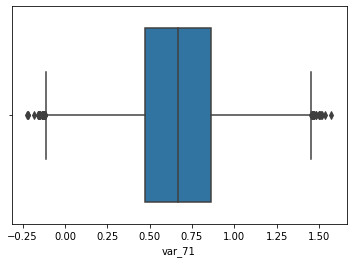

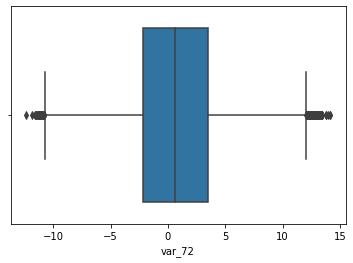

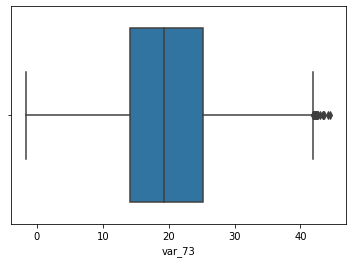

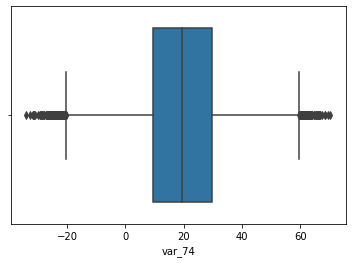

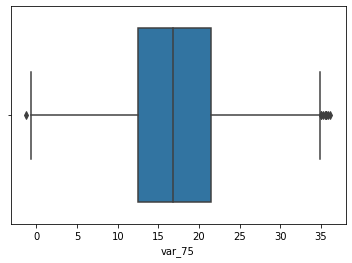

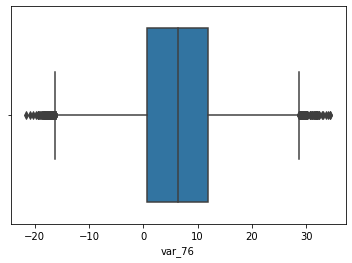

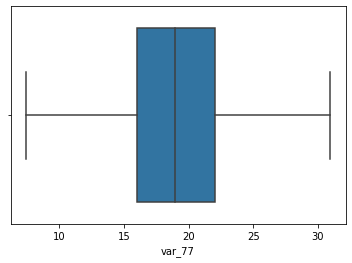

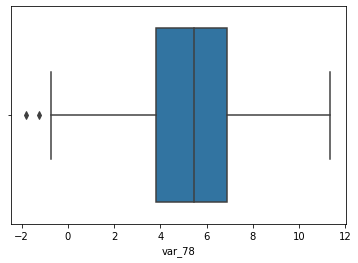

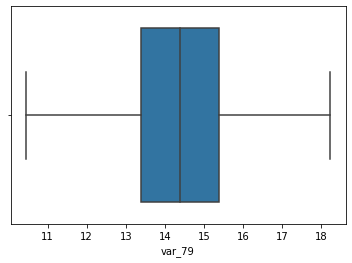

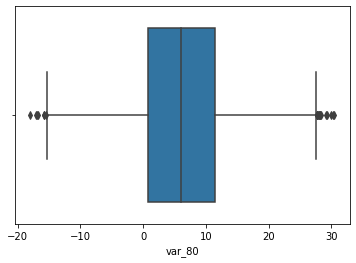

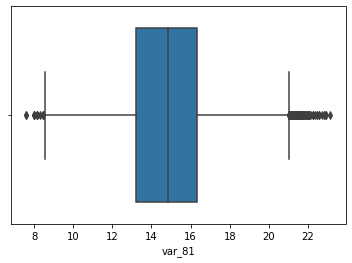

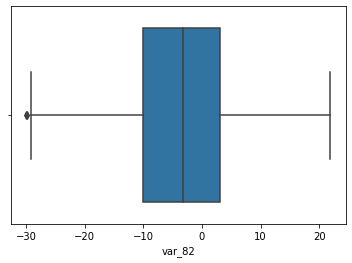

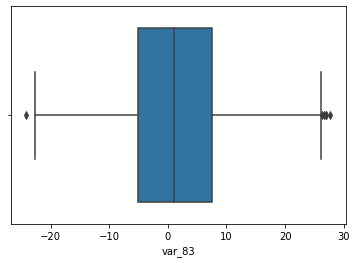

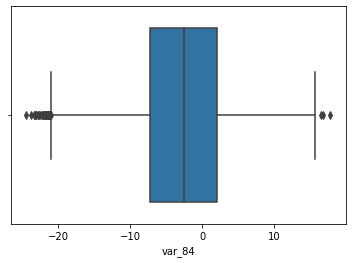

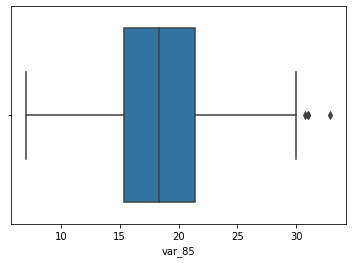

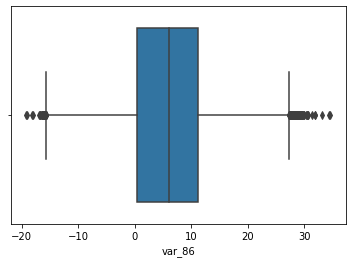

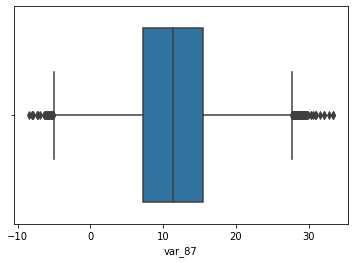

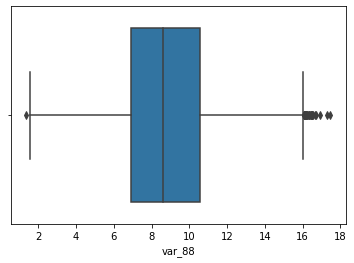

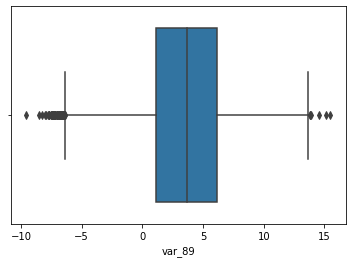

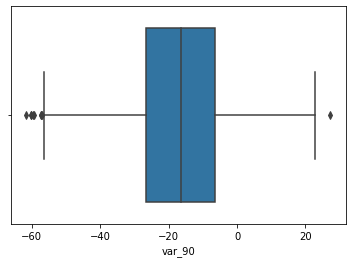

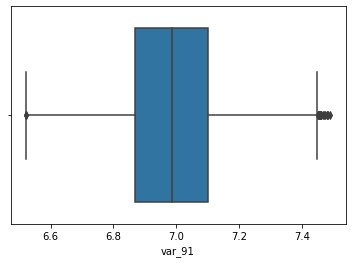

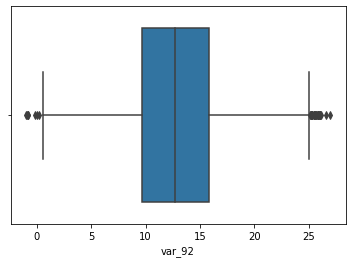

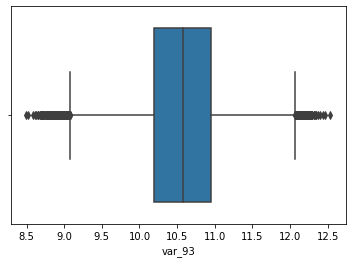

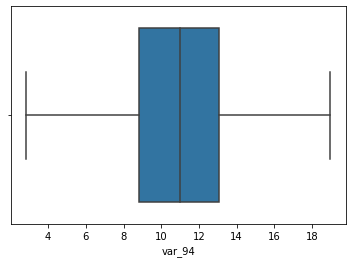

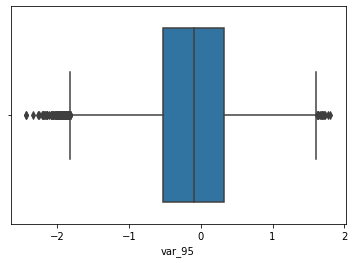

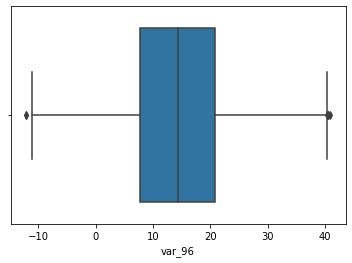

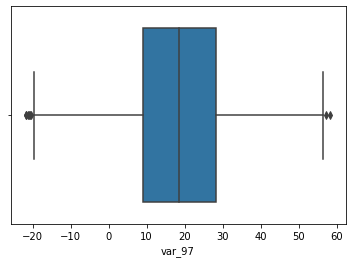

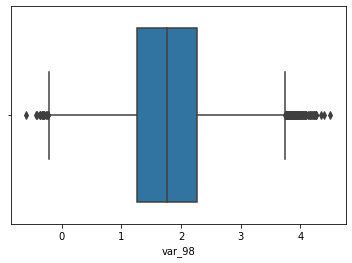

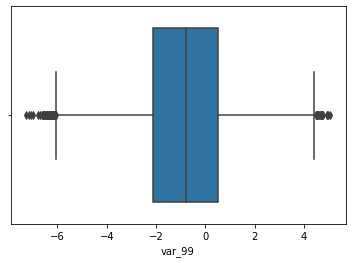

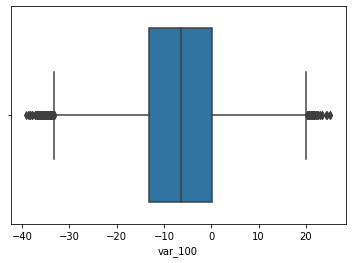

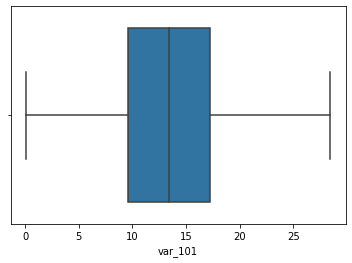

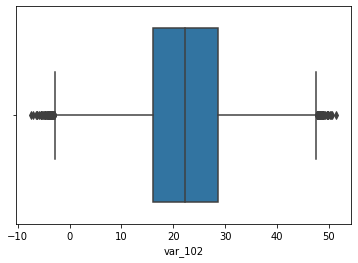

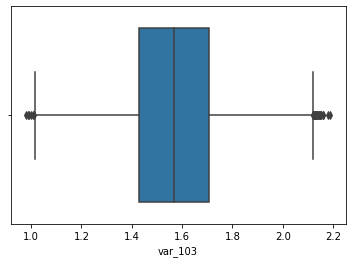

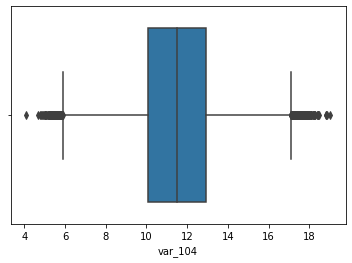

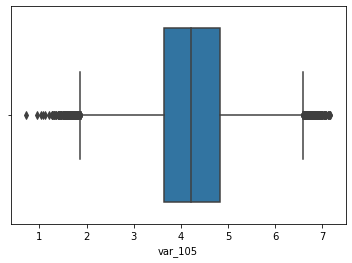

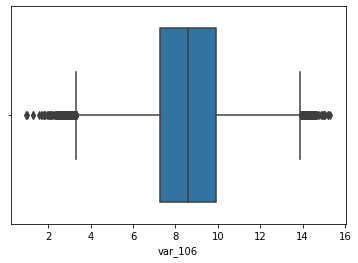

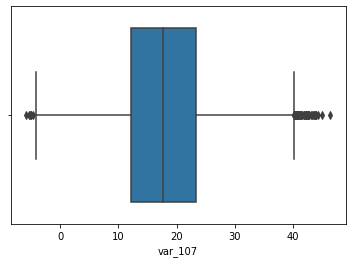

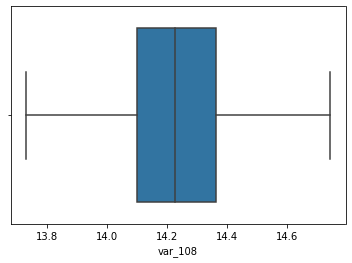

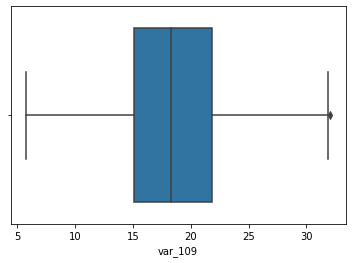

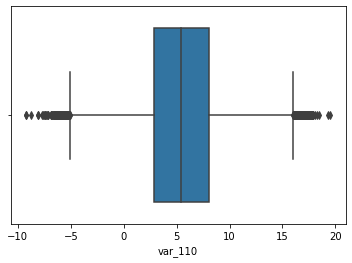

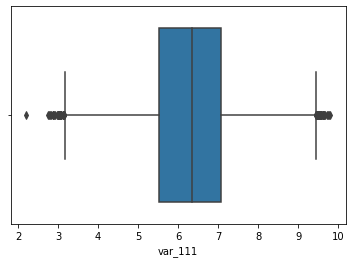

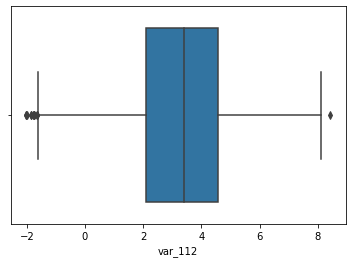

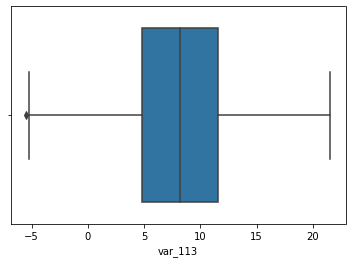

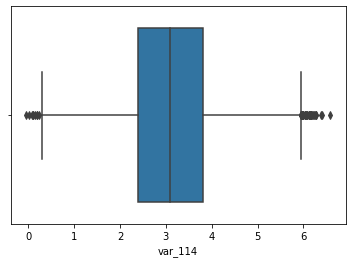

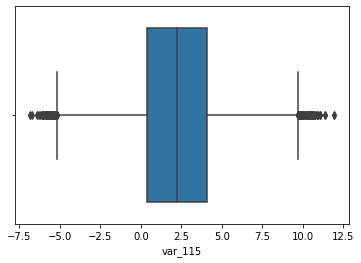

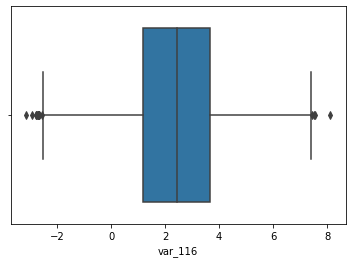

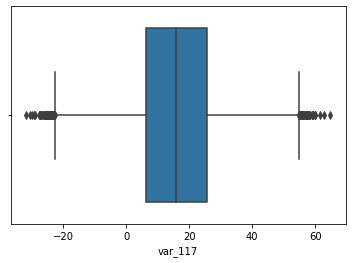

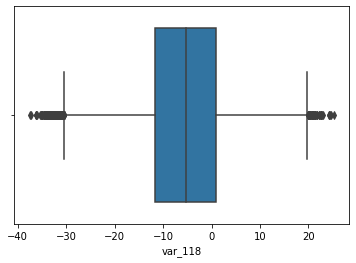

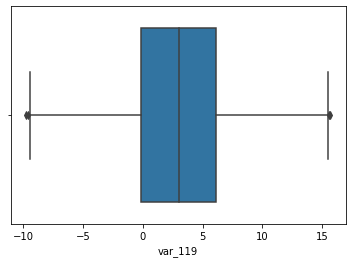

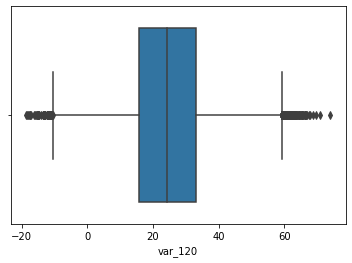

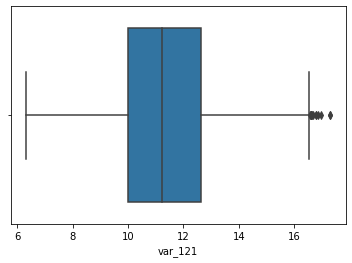

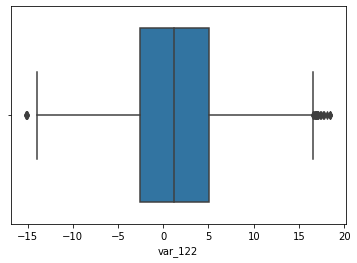

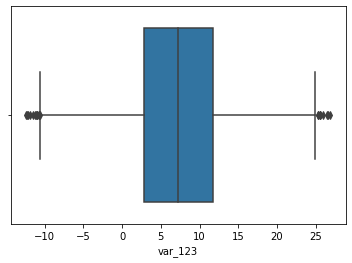

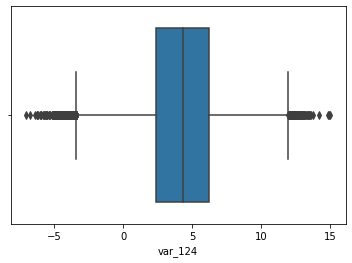

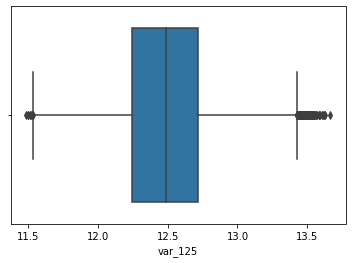

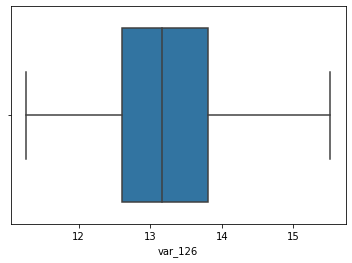

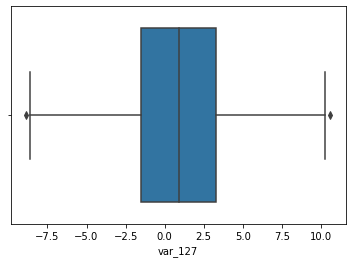

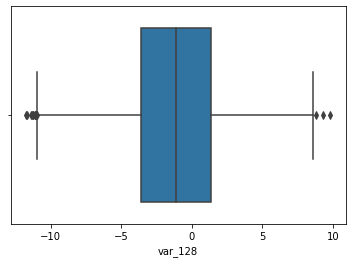

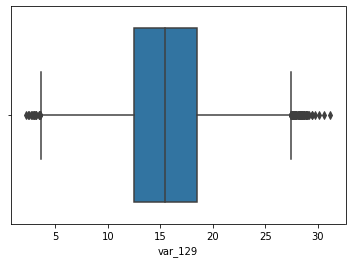

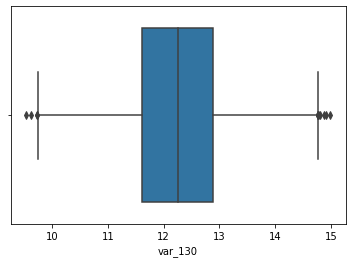

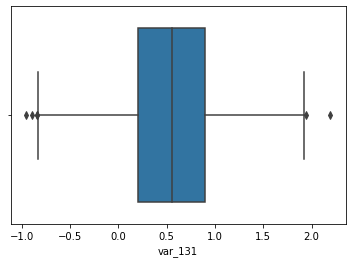

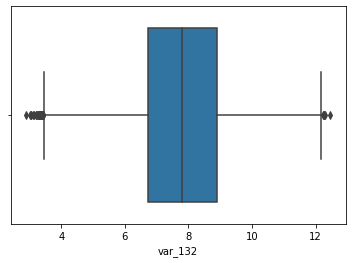

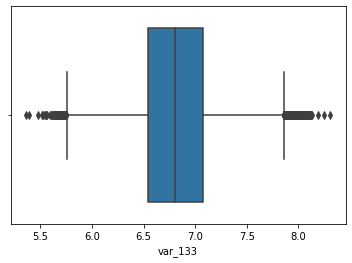

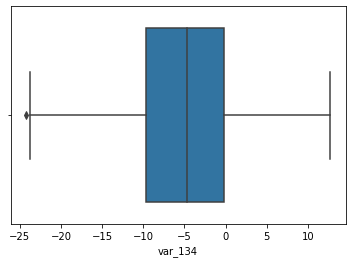

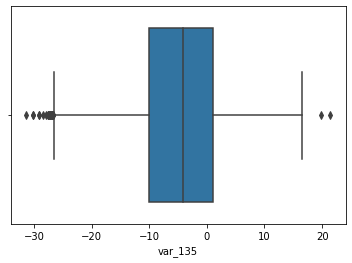

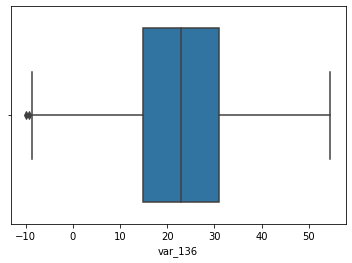

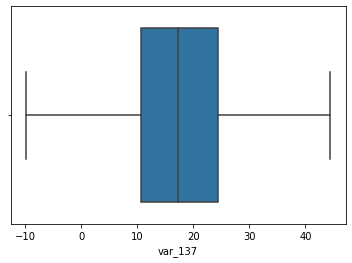

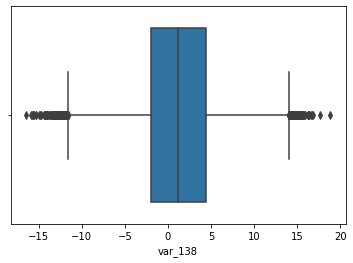

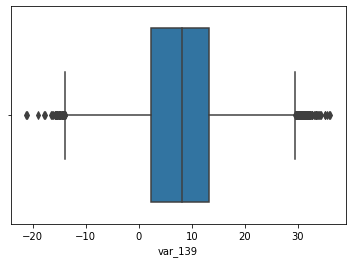

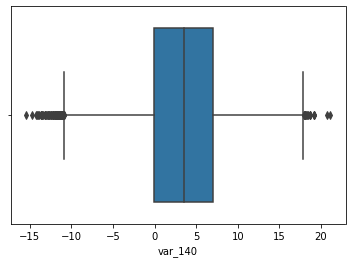

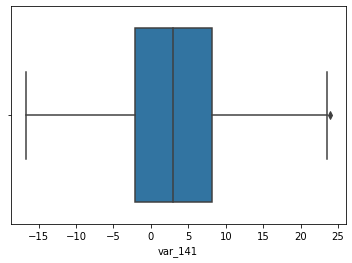

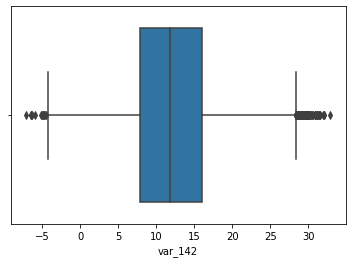

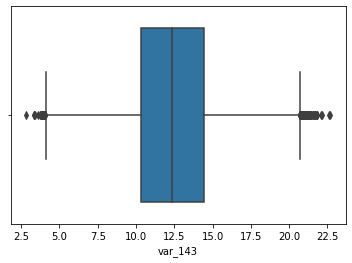

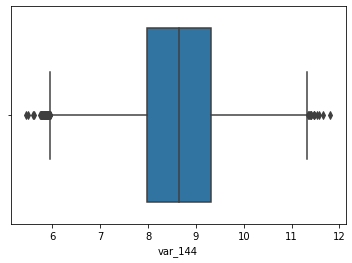

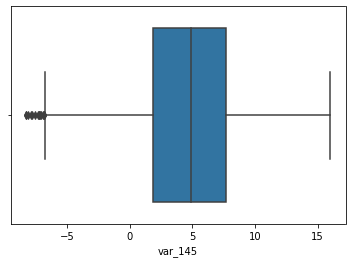

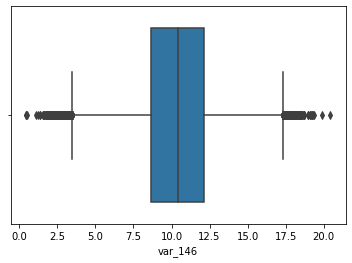

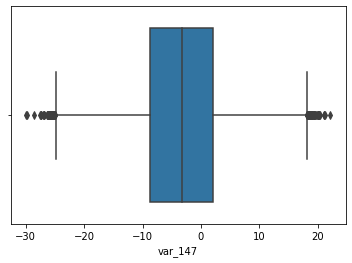

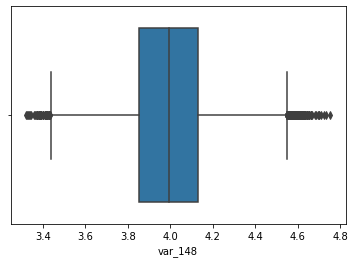

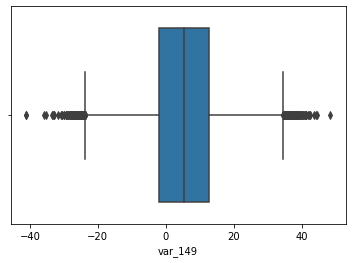

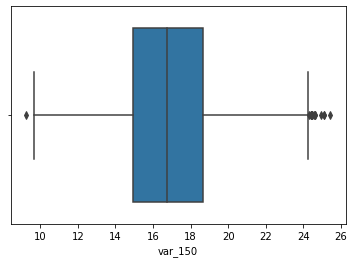

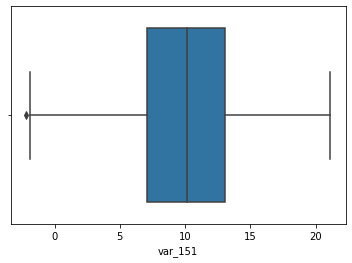

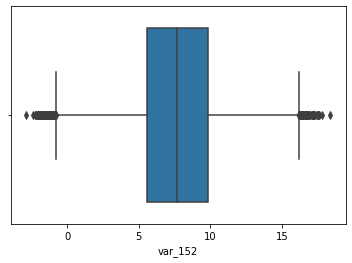

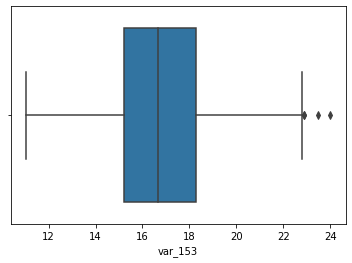

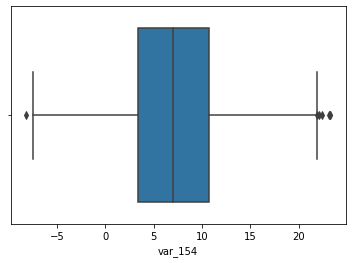

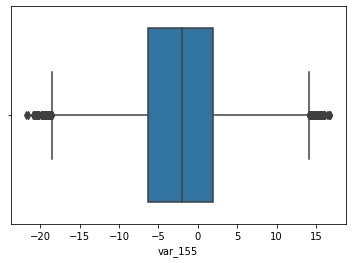

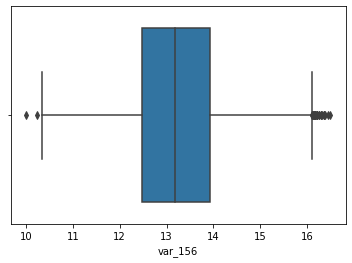

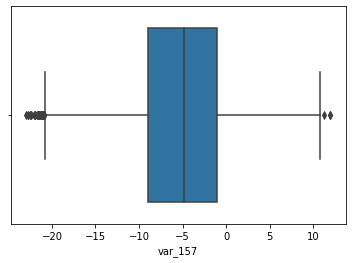

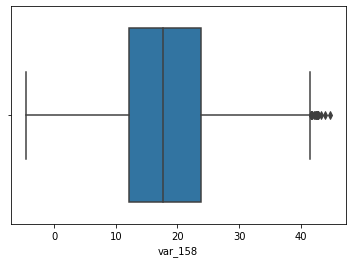

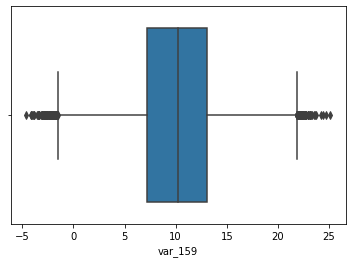

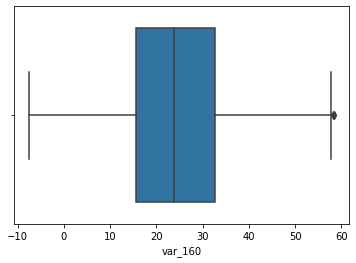

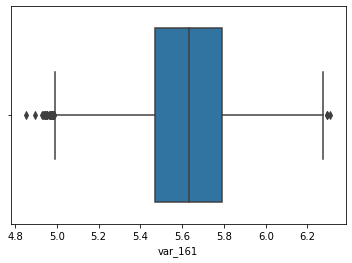

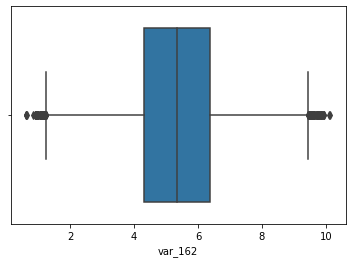

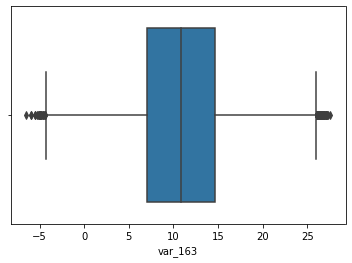

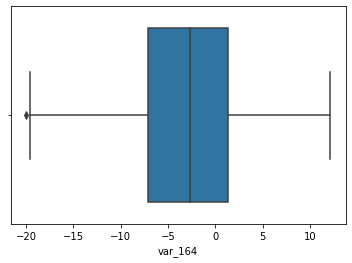

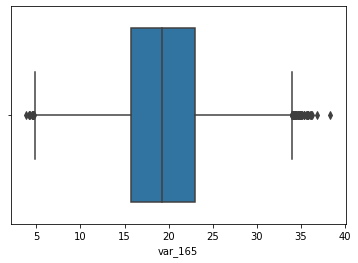

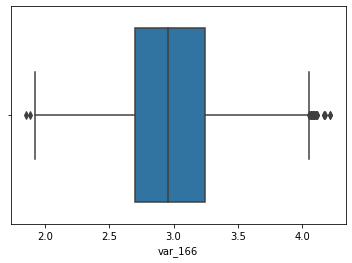

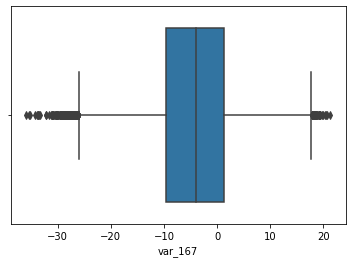

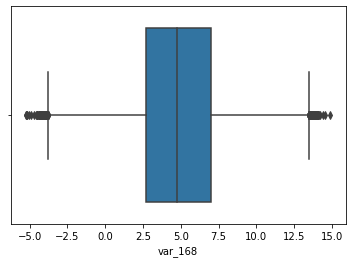

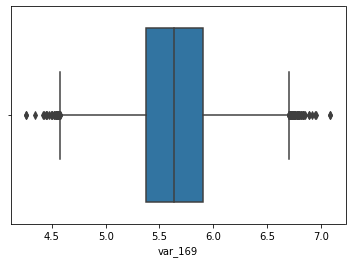

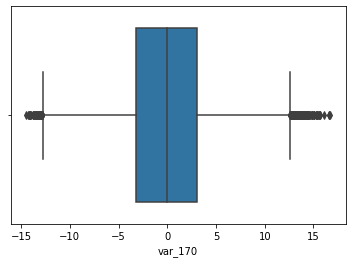

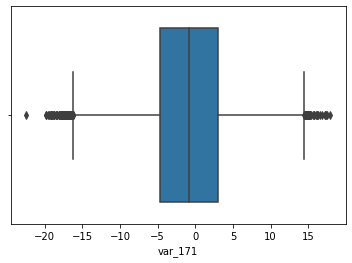

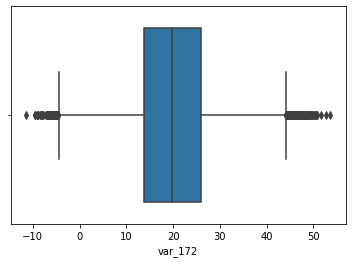

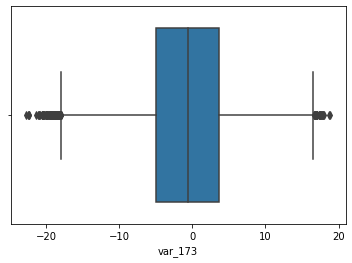

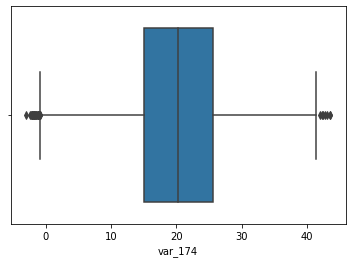

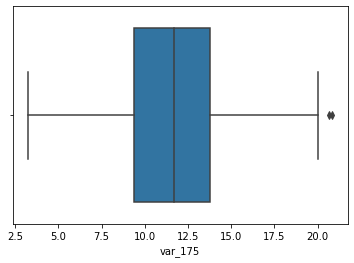

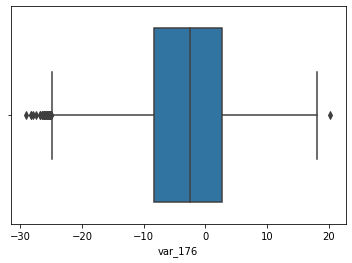

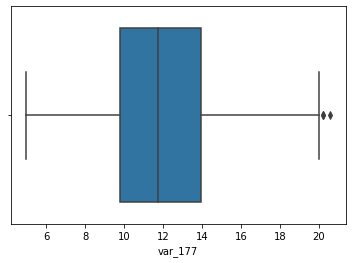

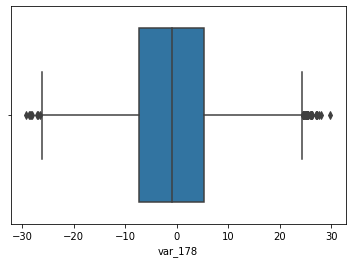

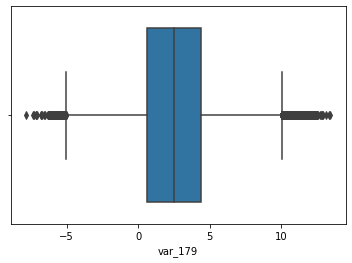

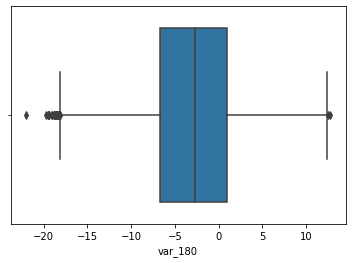

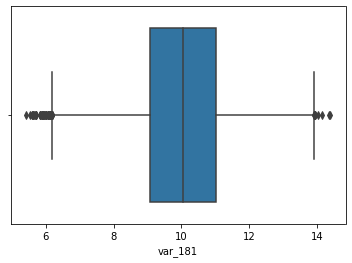

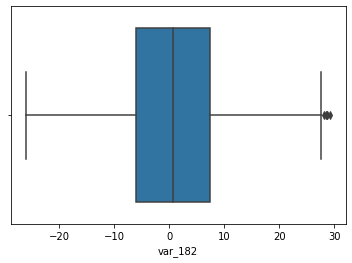

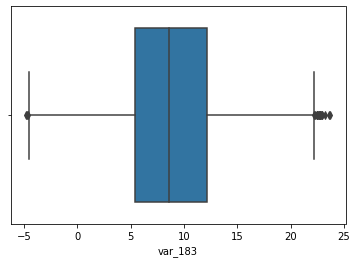

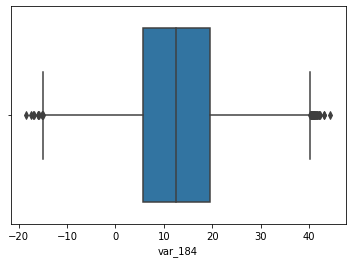

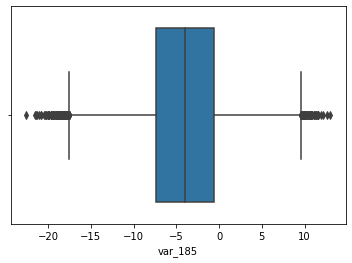

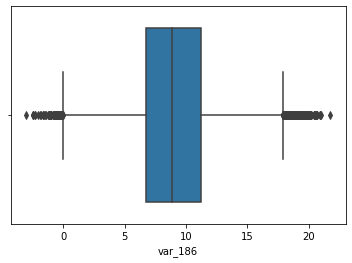

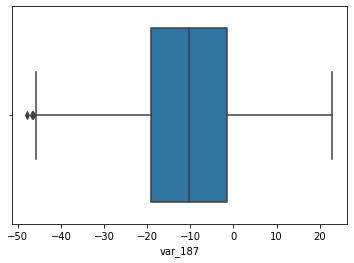

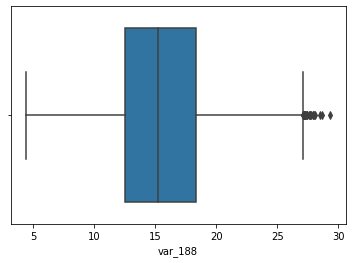

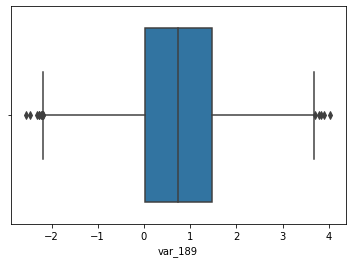

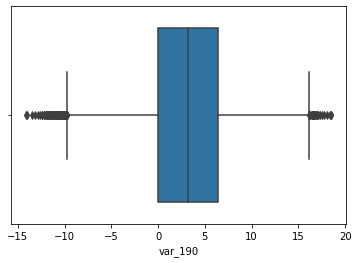

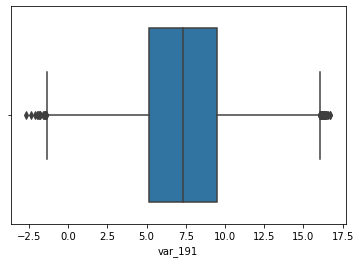

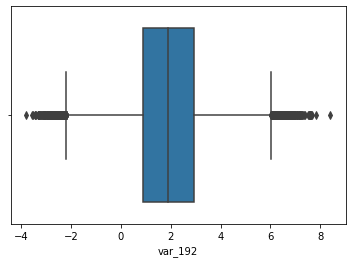

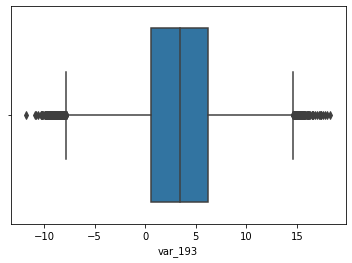

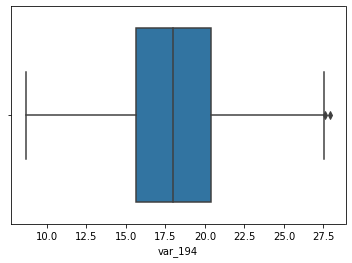

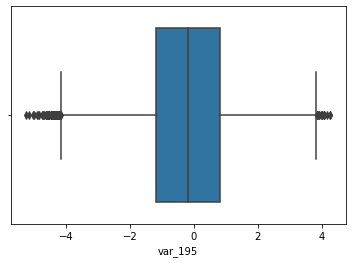

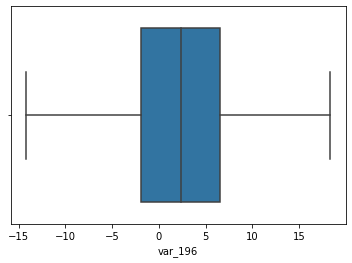

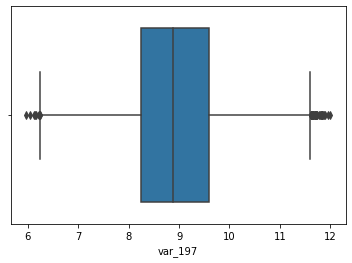

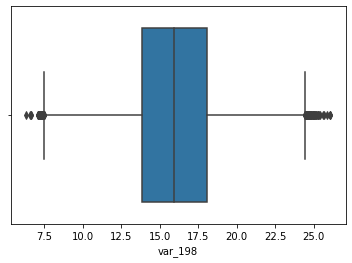

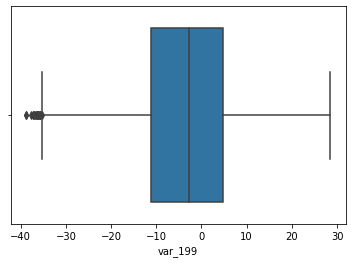

In [76]:
plt.figure(figsize=(8,3))
%matplotlib inline

#sns.boxplot(x=df_train,data=df_train,orient='h')

for i, col in enumerate(df_train.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df_train)

In [77]:
list = []
for i in df_train:
  Q1 =  df_train[i].quantile(0.25)
  Q3 = df_train[i].quantile(0.75)
  IQR = Q3 - Q1
  x= (df_train[(df_train[i] < Q1-1.5*IQR ) | (df_train[i] > Q3+1.5*IQR)][i]).shape
  list.append(x)
  maximum = Q3+1.5*IQR
  minimum = Q1-1.5*IQR
  print(i,":")
  print("Max Value:",maximum,"Min Value:", minimum)
  print("Outlier Count",x,"\n")  



var_0 :
Max Value: 19.214725 Min Value: 1.9973250000000018
Outlier Count (104,) 

var_1 :
Max Value: 10.5066 Min Value: -13.888000000000002
Outlier Count (6,) 

var_2 :
Max Value: 18.208037500000003 Min Value: 3.031137499999998
Outlier Count (49,) 

var_3 :
Max Value: 12.9291375 Min Value: 0.6490375000000013
Outlier Count (22,) 

var_4 :
Max Value: 15.828050000000005 Min Value: 6.316249999999997
Outlier Count (76,) 

var_5 :
Max Value: 19.112525 Min Value: -29.388075
Outlier Count (4,) 

var_6 :
Max Value: 7.855949999999998 Min Value: 2.91475
Outlier Count (113,) 

var_7 :
Max Value: 26.841550000000005 Min Value: 6.205149999999996
Outlier Count (19,) 

var_8 :
Max Value: 10.821449999999999 Min Value: -10.20135
Outlier Count (2,) 

var_9 :
Max Value: 11.532862499999998 Min Value: 3.6703625000000013
Outlier Count (0,) 

var_10 :
Max Value: 16.349737500000003 Min Value: -15.561762500000002
Outlier Count (125,) 

var_11 :
Max Value: 13.397962499999998 Min Value: -20.0557375
Outlier Count (

**Total outliers count/percentage**

In [78]:
df_outliers = pd.DataFrame(list)
df_outliers.reset_index(drop=True, inplace=True)
df_outliers.columns = ["counts"]
df_outliers["counts"] = df_outliers["counts"].astype(int)
total_number_of_outliers = df_outliers['counts'].sum()
print("Total Number of Outliers:", total_number_of_outliers)
total_number_of_outliers_percentage = total_number_of_outliers/(len(df_train))
print("Total Percentage of Outliers:",total_number_of_outliers_percentage*100,"%")

Total Number of Outliers: 26536
Total Percentage of Outliers: 13.267999999999999 %


**Replacing/Capping outliers by their respective upper and lower fence**

In [0]:
for i in df_train:
  Q1 =  df_train[i].quantile(0.25)
  Q3 = df_train[i].quantile(0.75)
  IQR = Q3 - Q1
  maximum = Q3+1.5*IQR
  minimum = Q1-1.5*IQR
  df_train.loc[df_train[i] > maximum, i] = maximum         # Replacing/capping outliers (which are beyond the upper fence) with maximum possible value 
  df_train.loc[df_train[i] < minimum, i] = minimum         # Replacing/capping outliers (which are beyond the lower fence) with minimum possible value

**Outlier Analysis Using Boxplot(After Dealing with Outliers)**

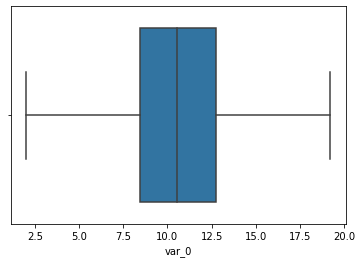

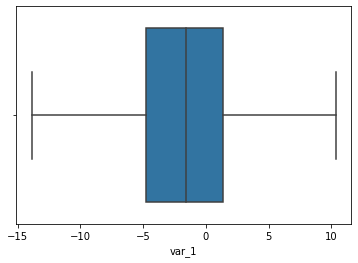

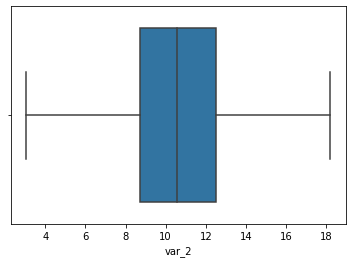

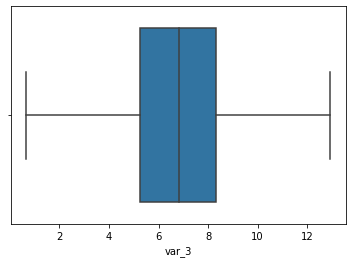

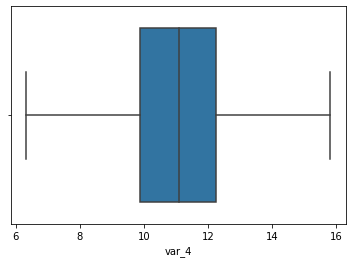

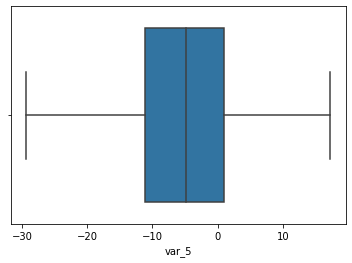

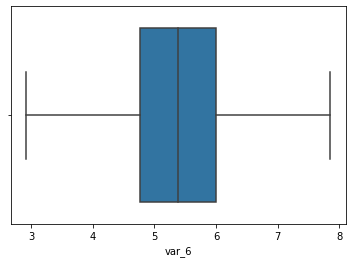

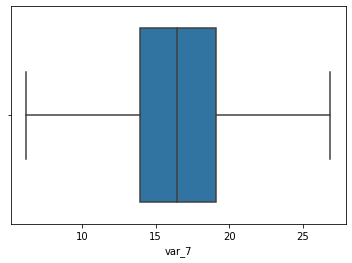

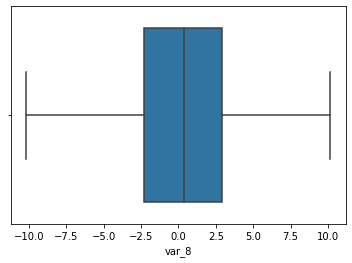

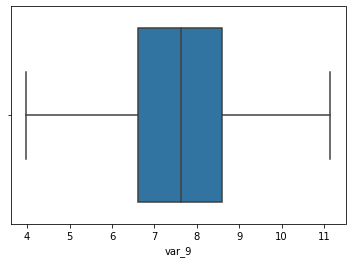

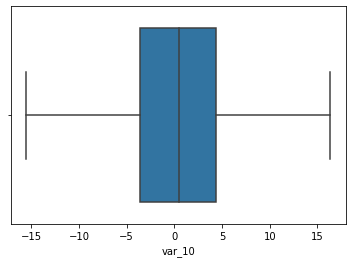

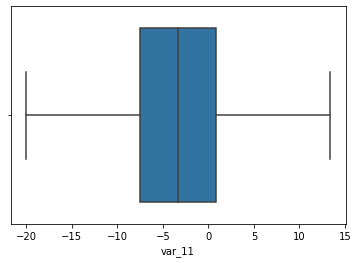

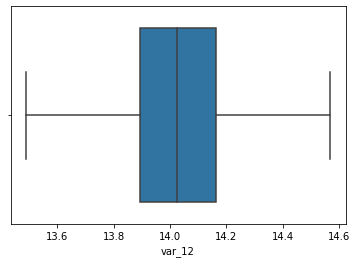

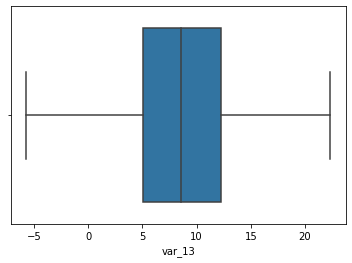

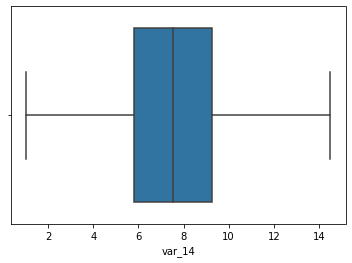

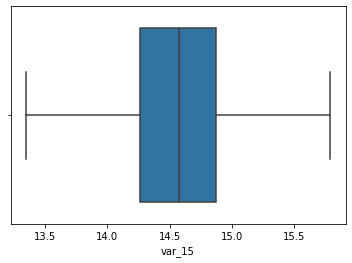

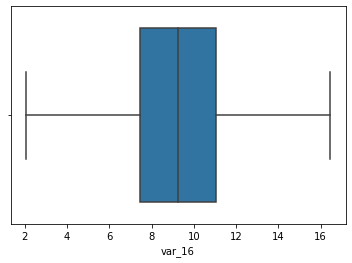

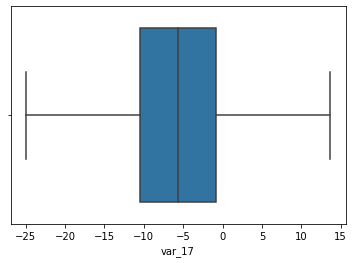

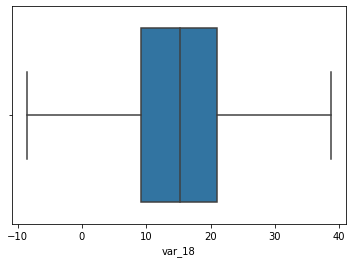

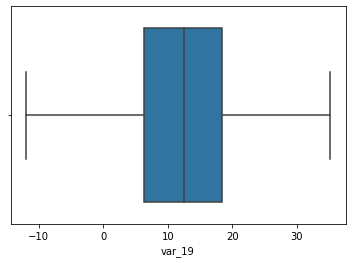

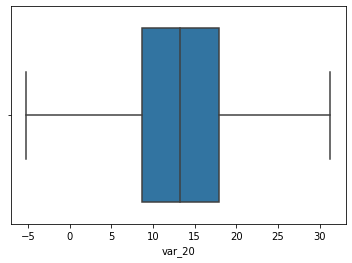

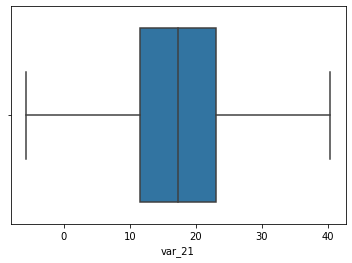

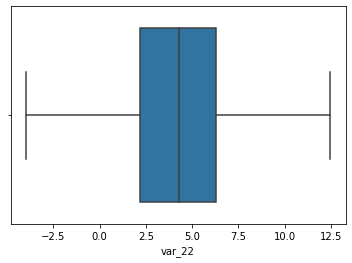

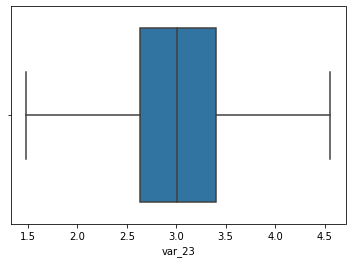

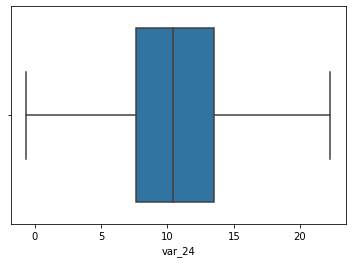

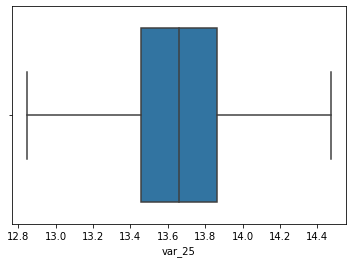

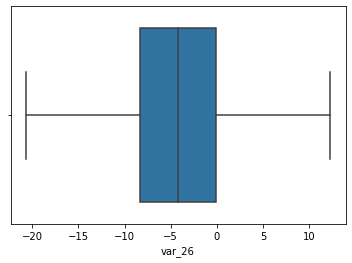

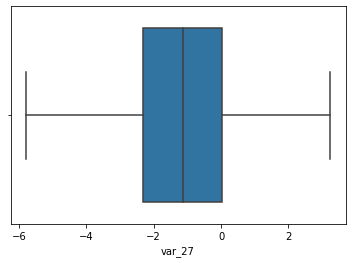

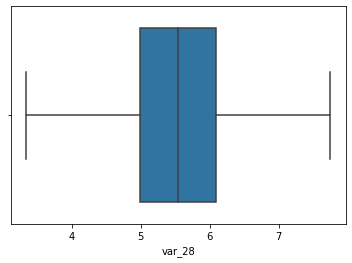

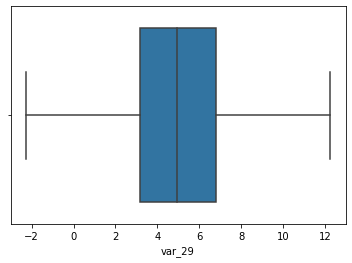

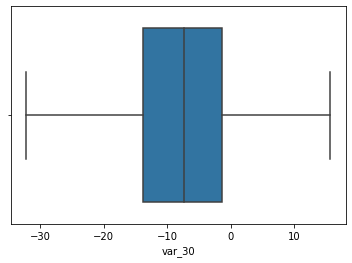

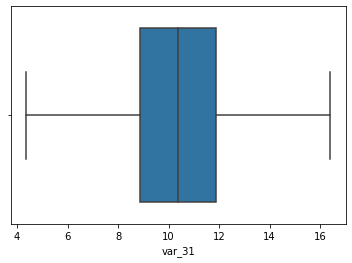

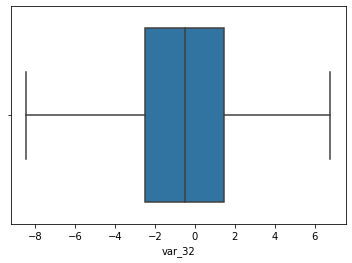

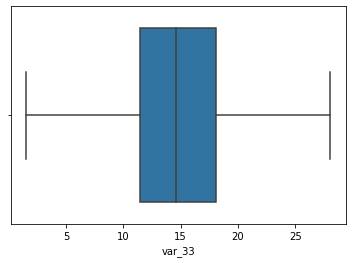

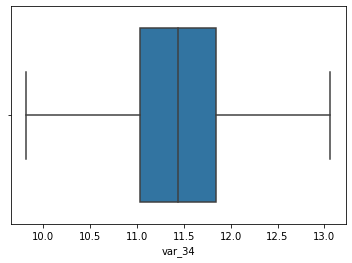

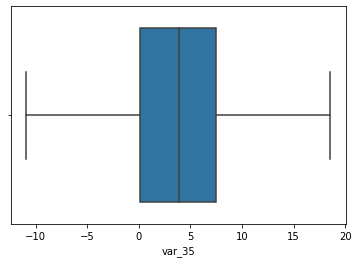

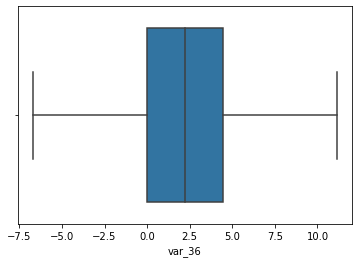

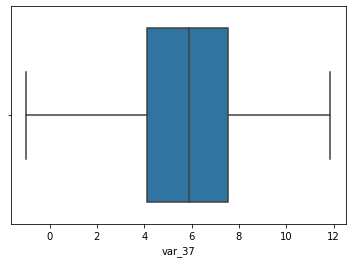

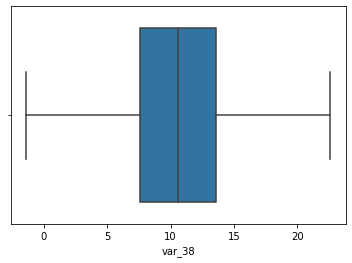

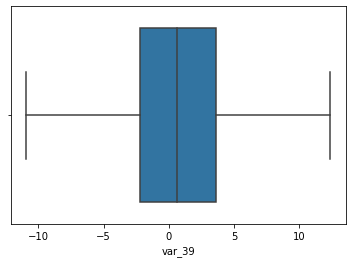

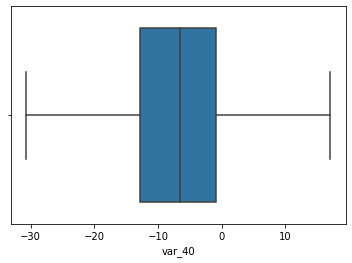

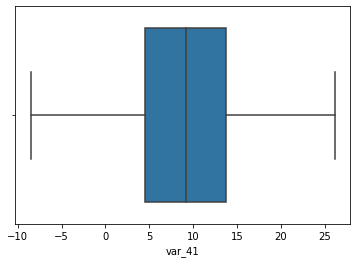

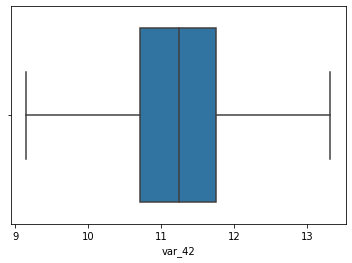

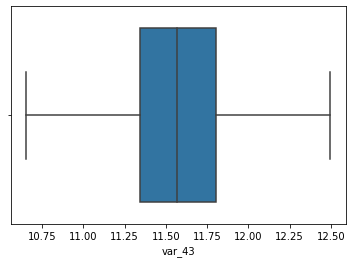

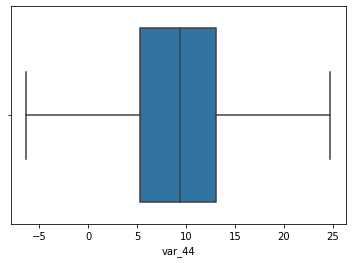

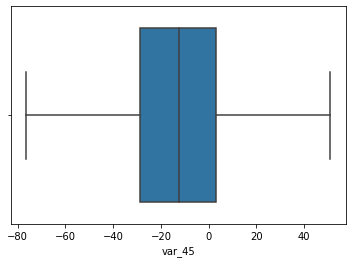

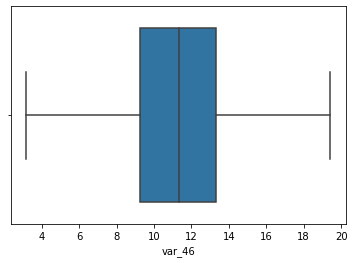

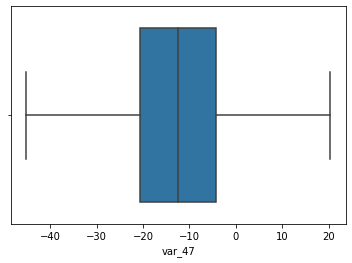

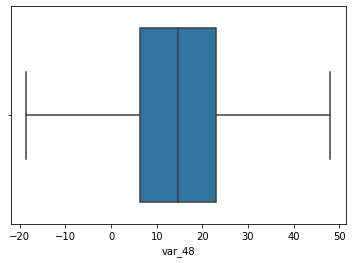

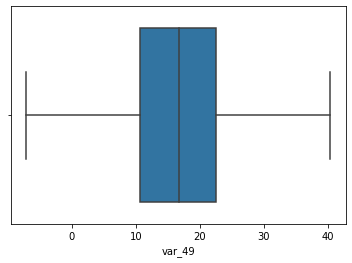

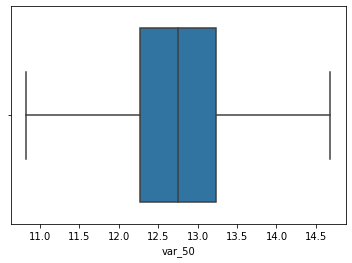

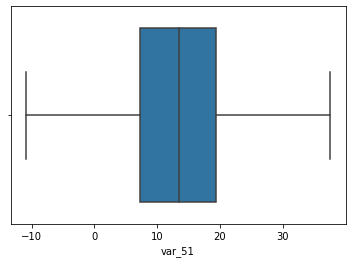

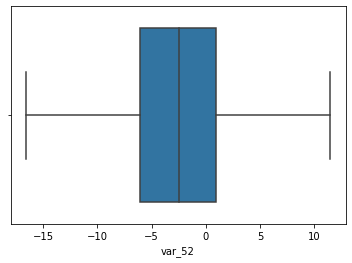

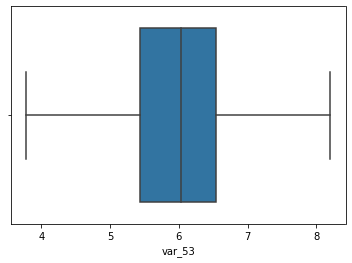

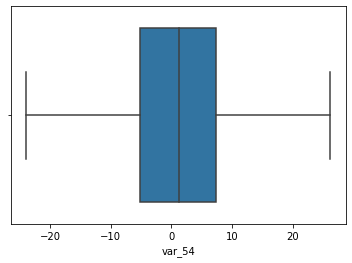

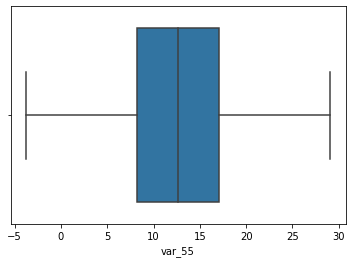

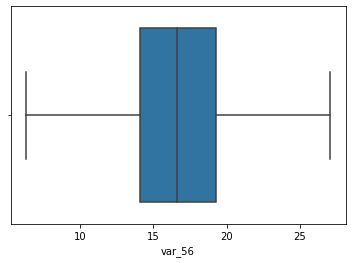

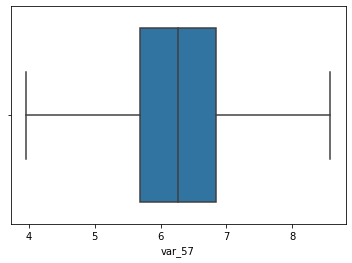

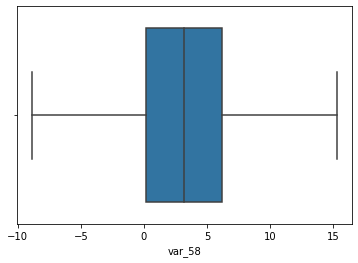

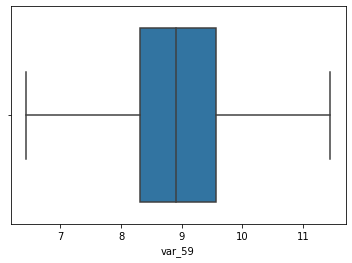

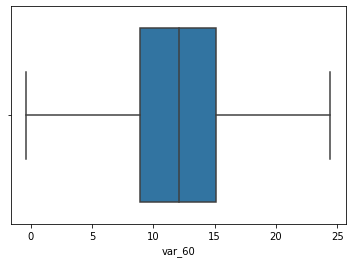

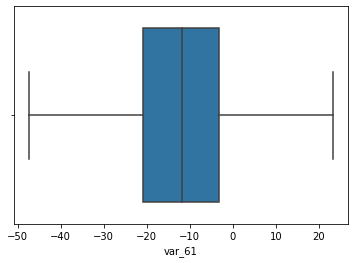

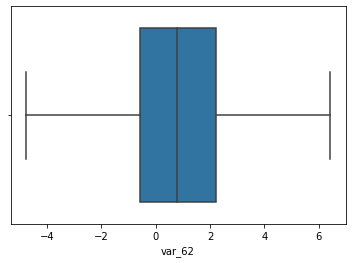

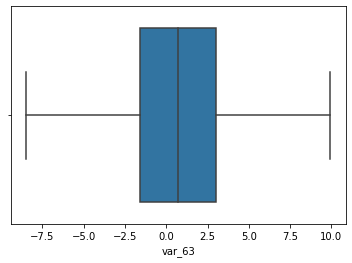

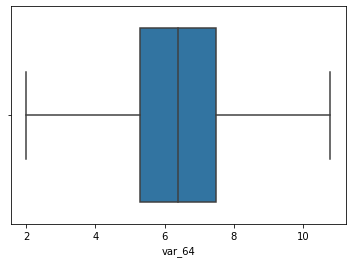

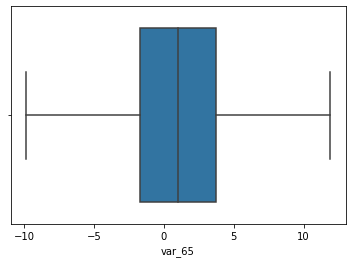

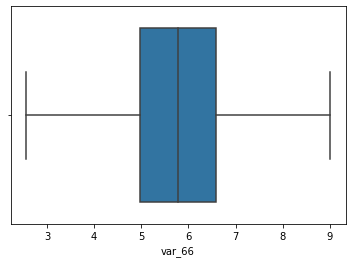

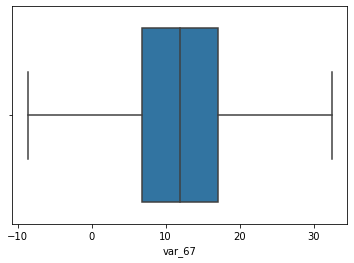

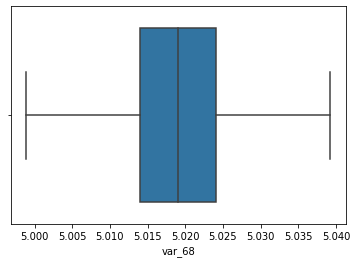

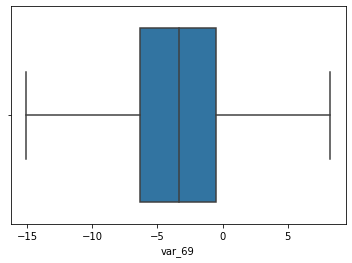

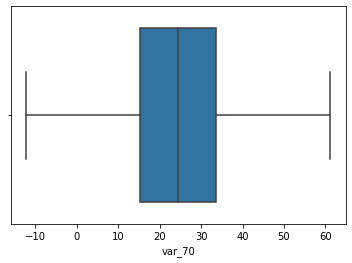

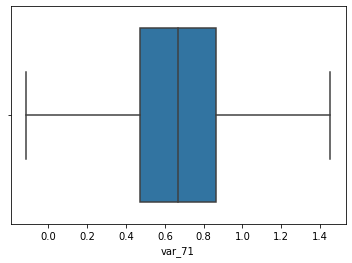

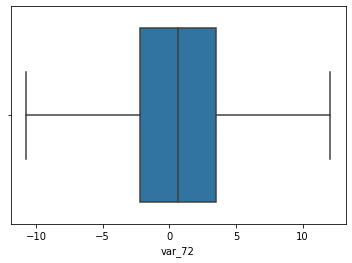

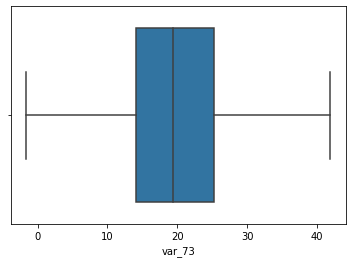

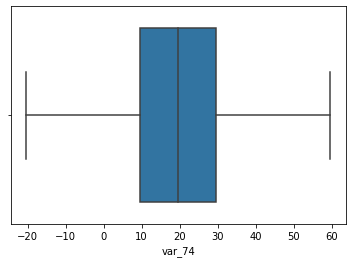

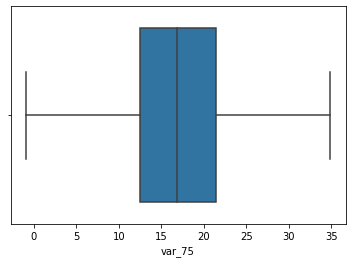

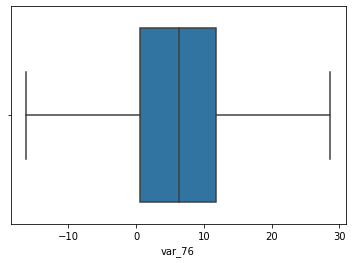

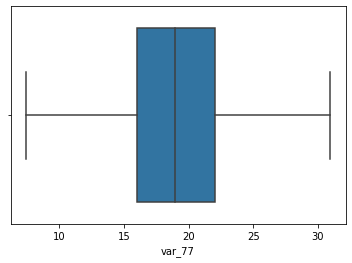

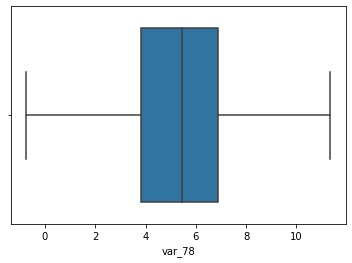

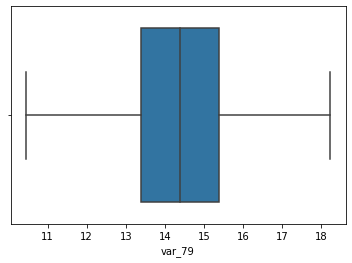

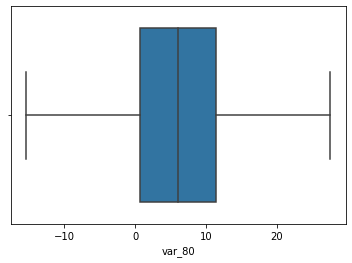

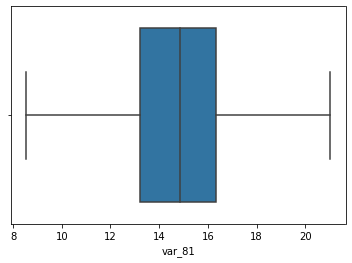

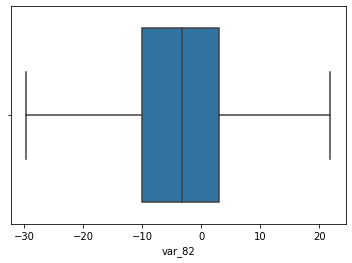

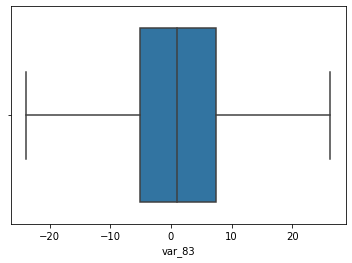

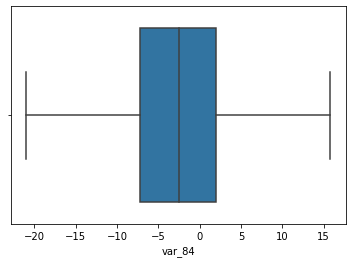

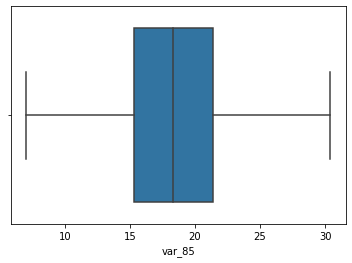

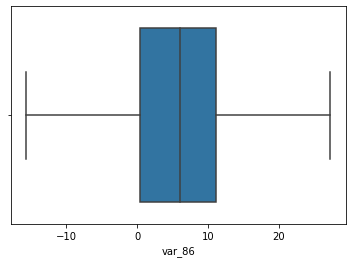

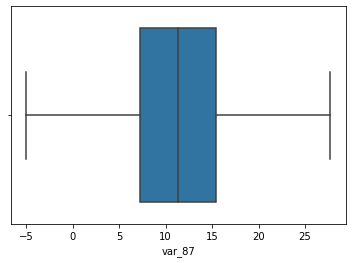

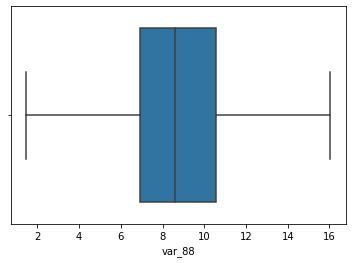

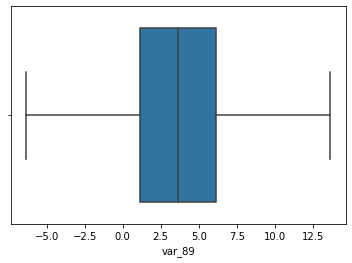

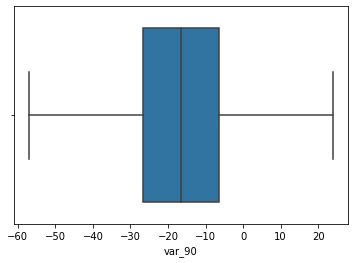

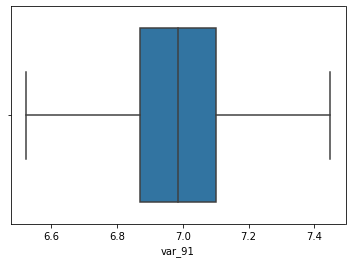

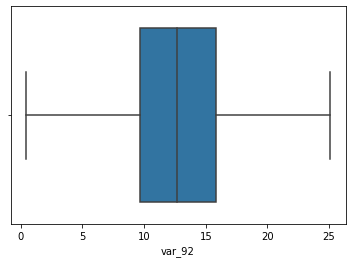

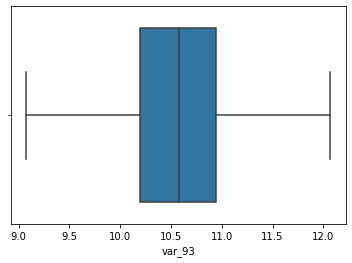

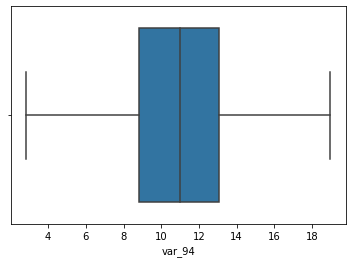

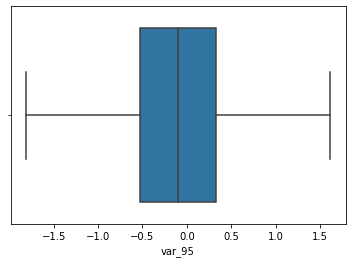

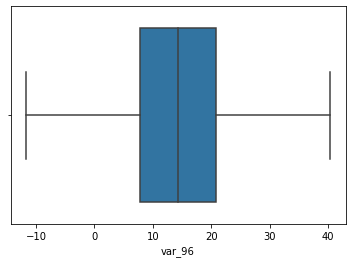

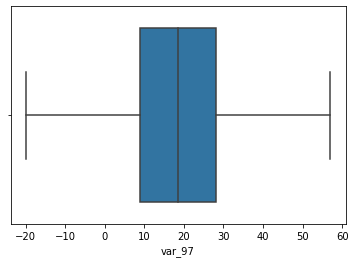

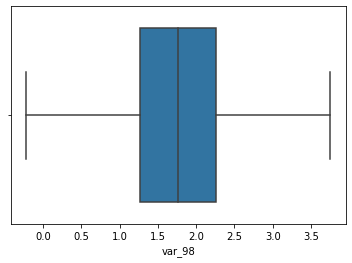

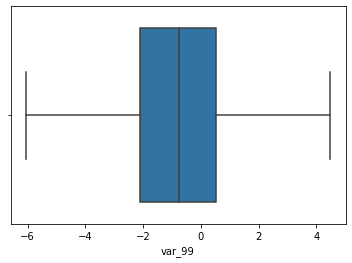

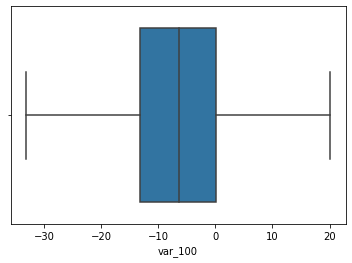

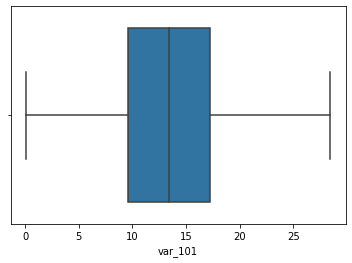

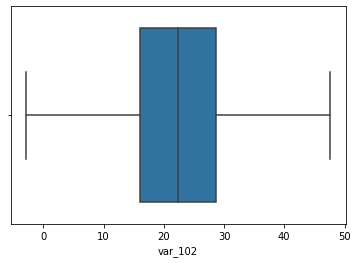

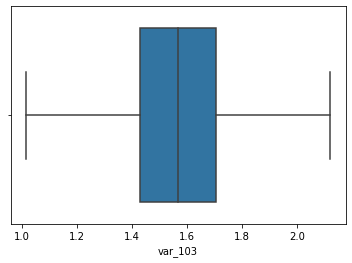

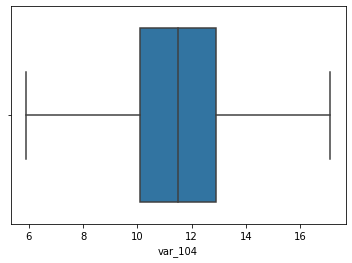

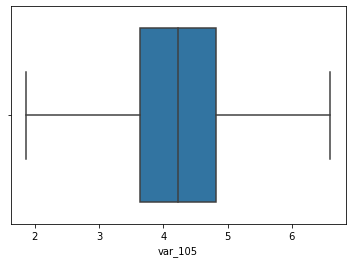

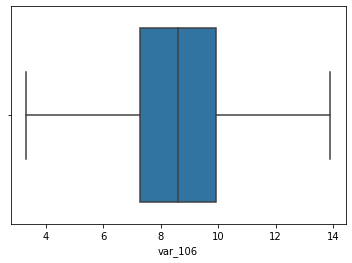

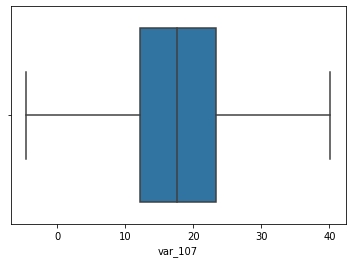

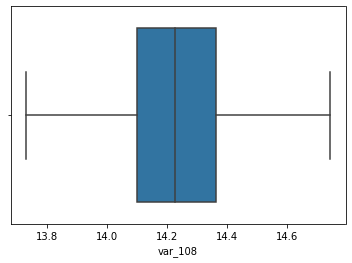

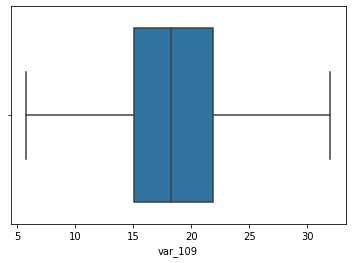

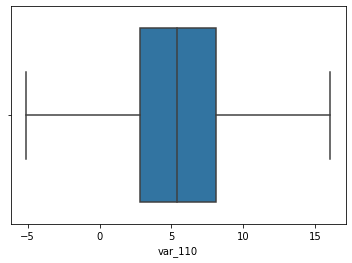

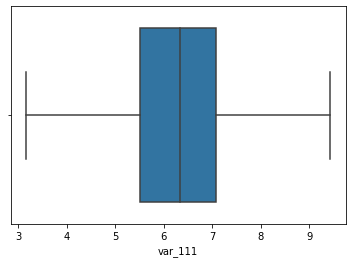

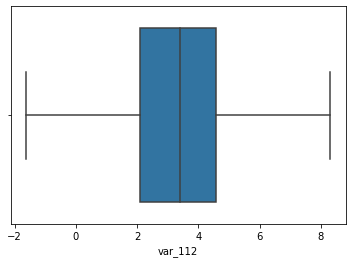

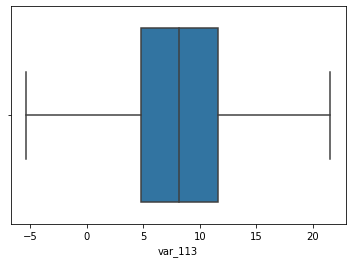

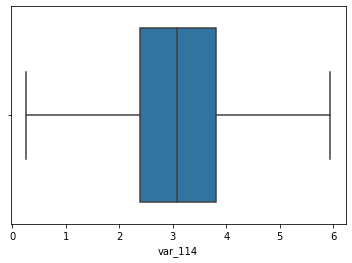

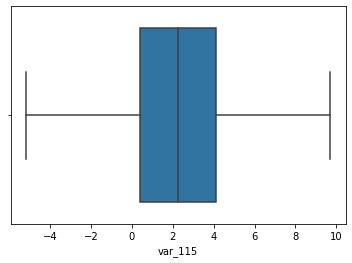

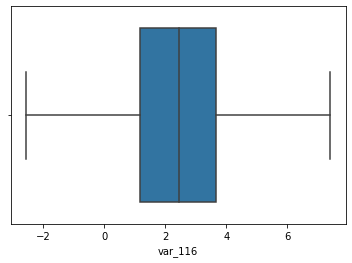

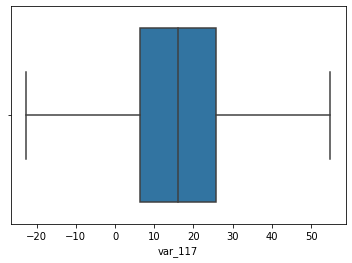

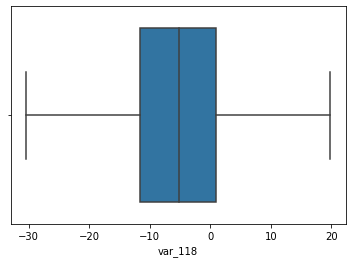

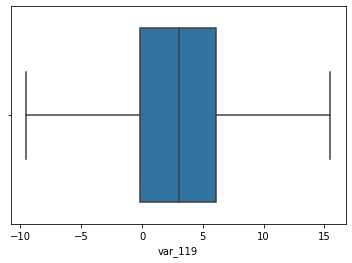

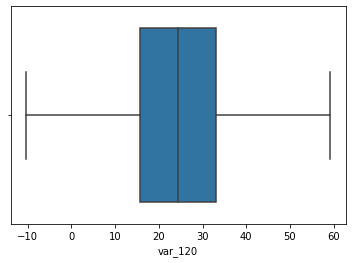

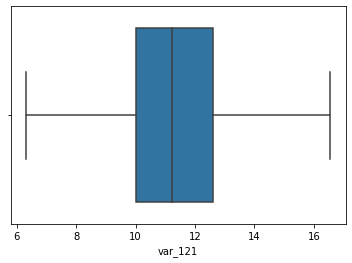

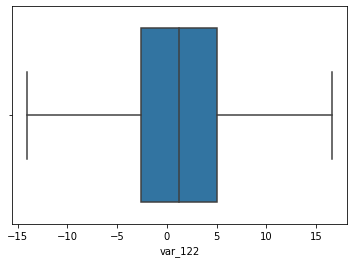

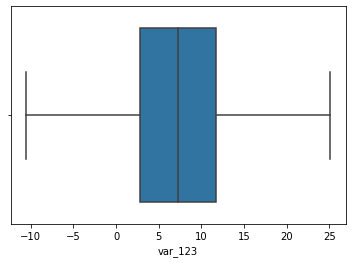

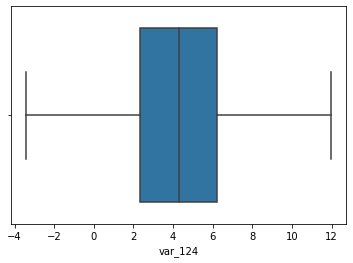

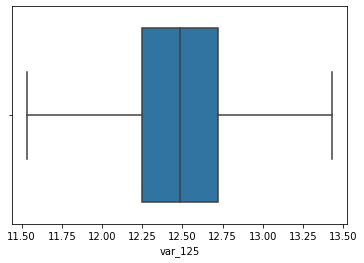

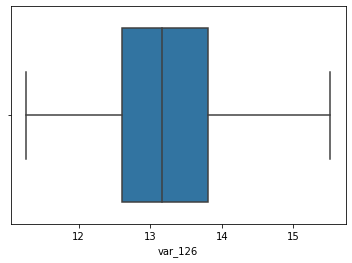

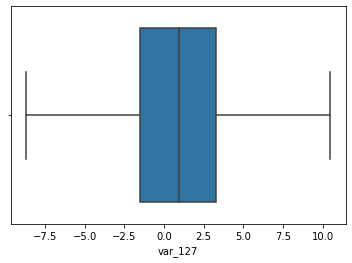

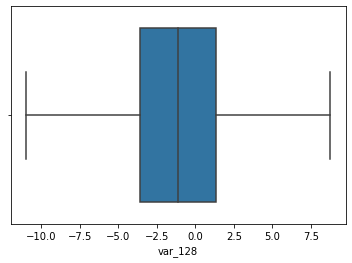

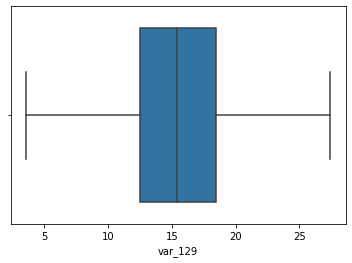

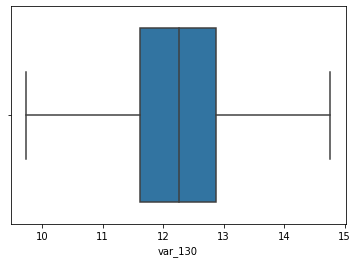

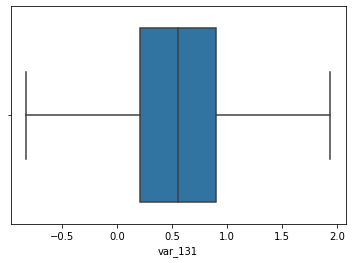

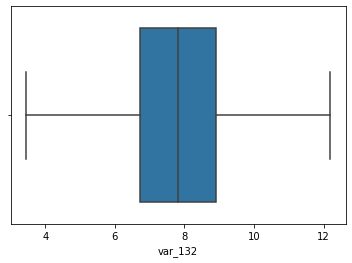

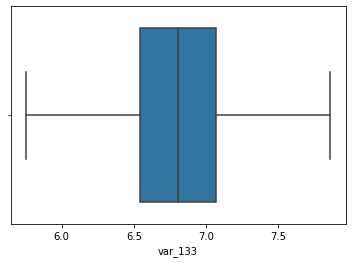

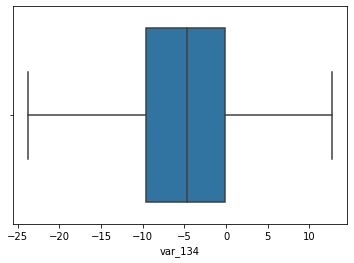

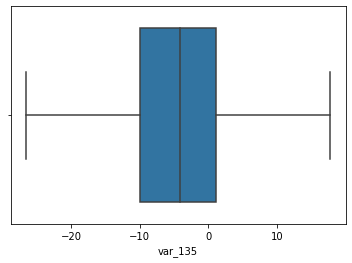

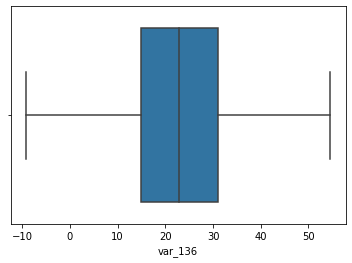

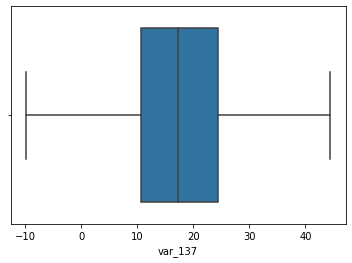

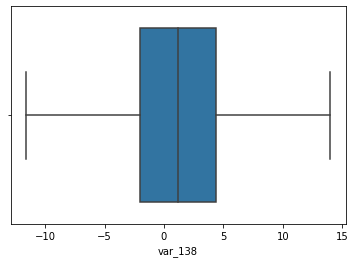

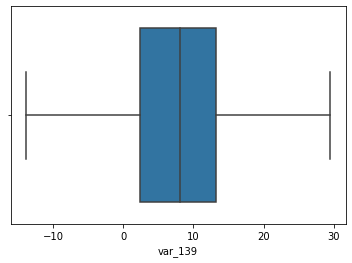

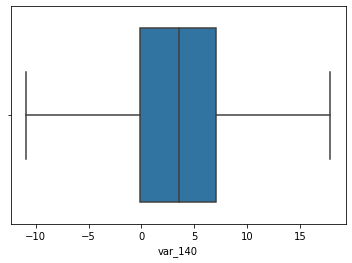

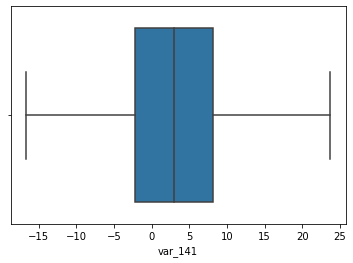

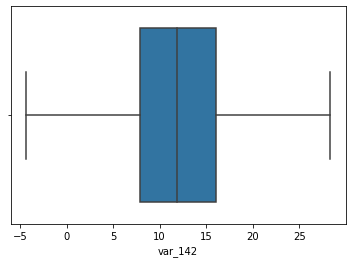

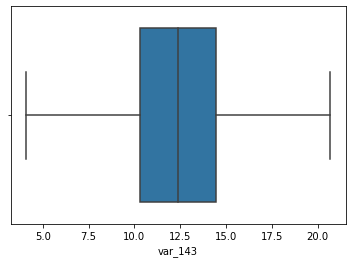

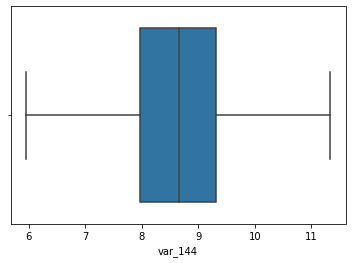

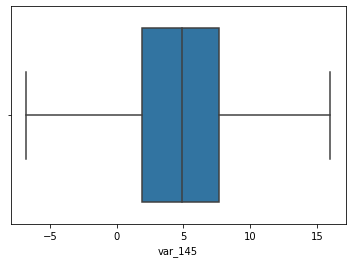

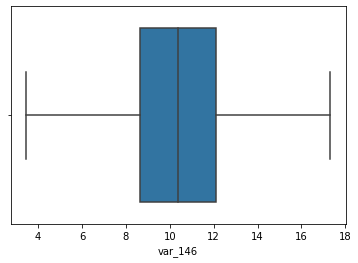

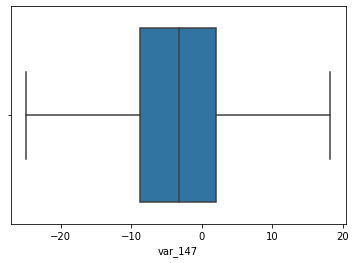

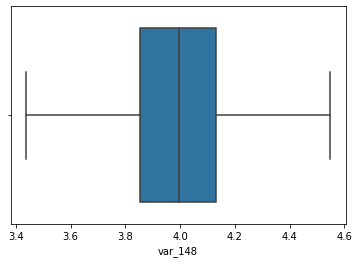

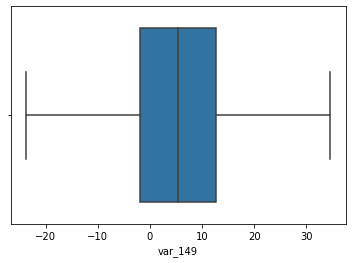

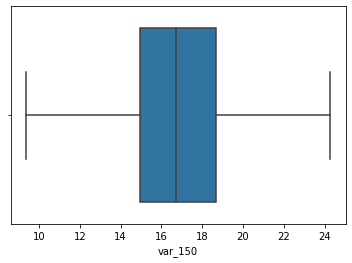

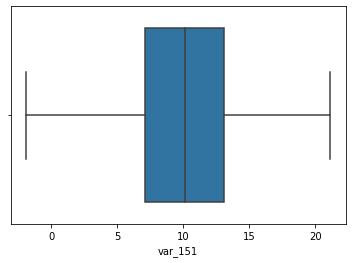

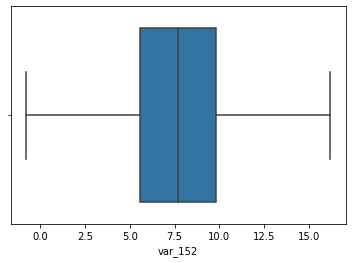

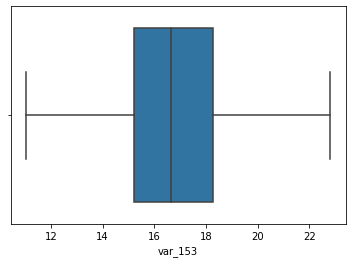

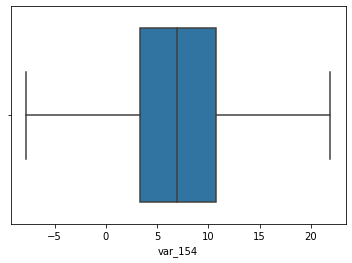

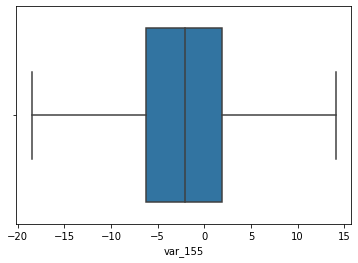

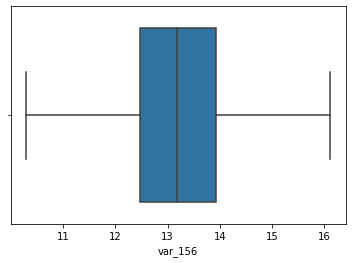

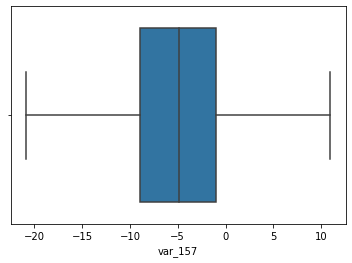

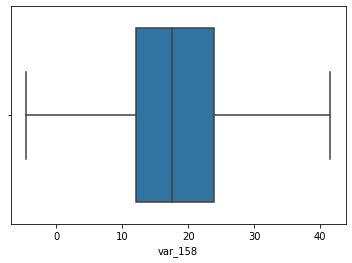

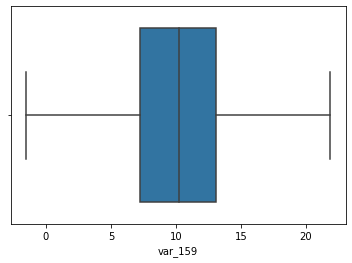

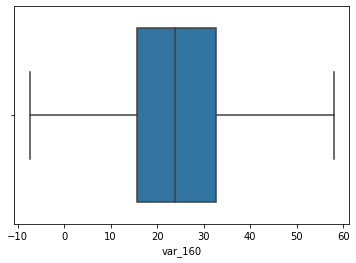

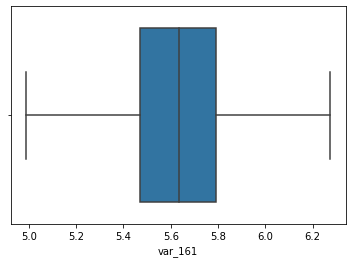

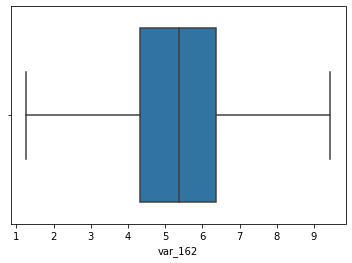

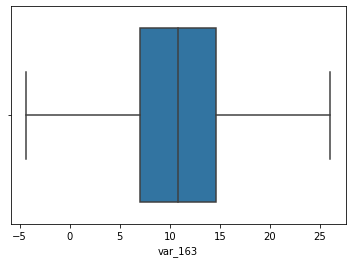

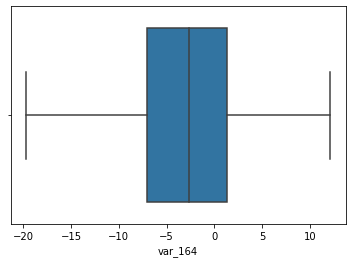

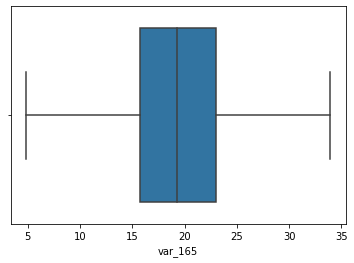

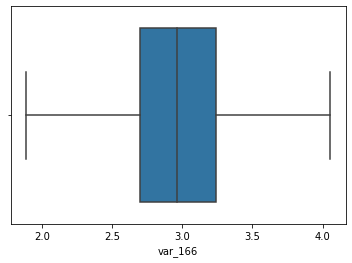

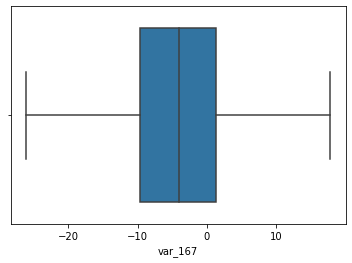

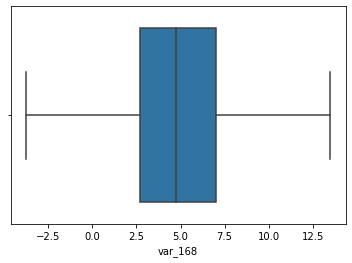

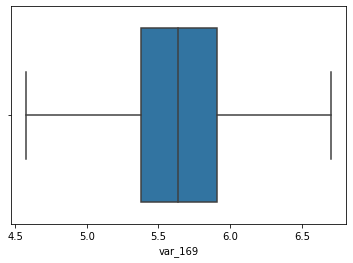

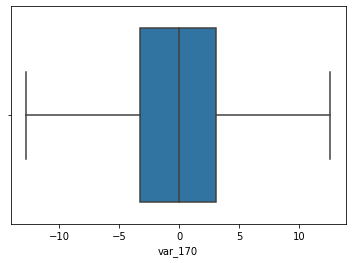

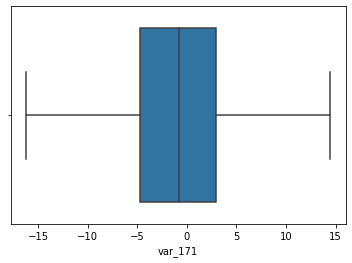

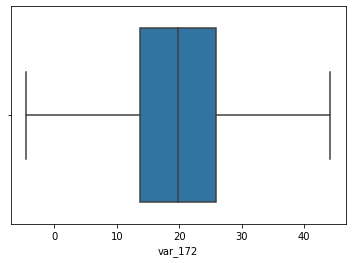

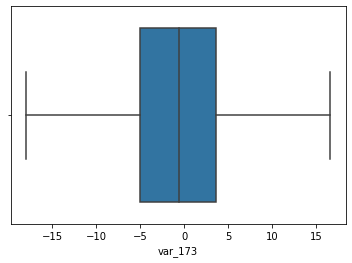

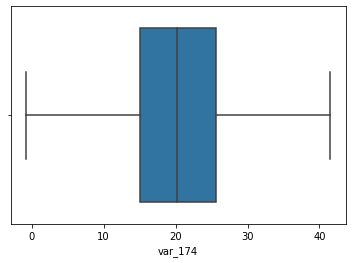

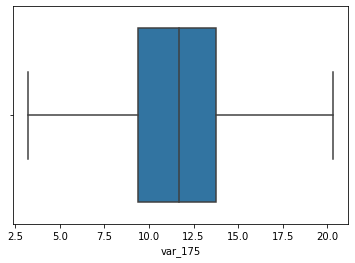

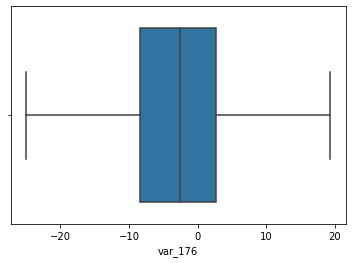

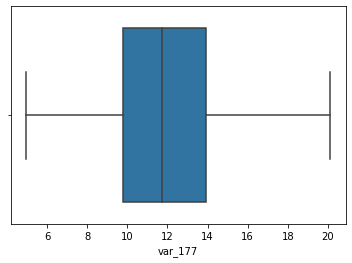

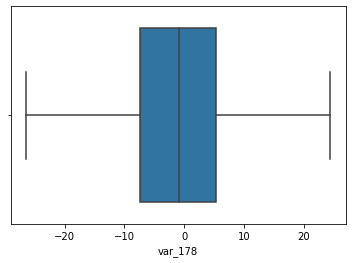

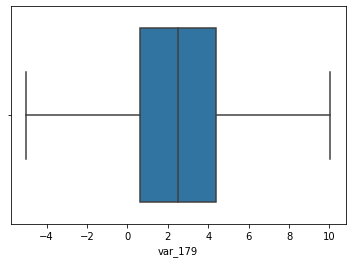

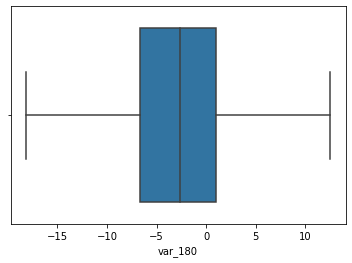

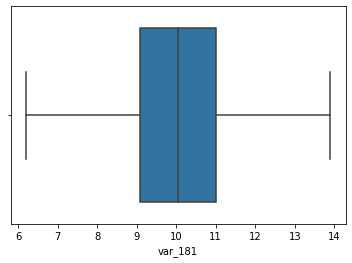

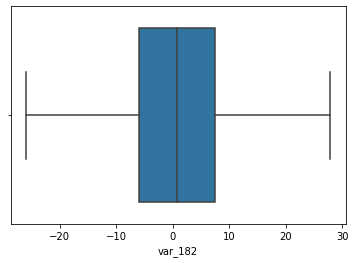

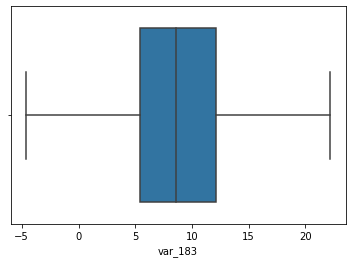

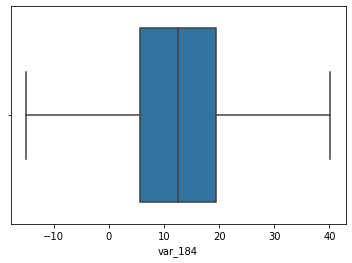

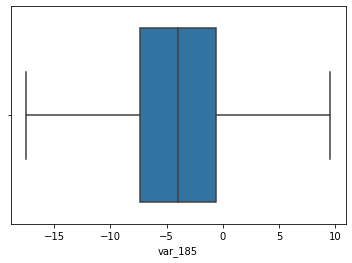

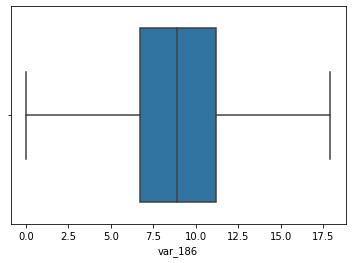

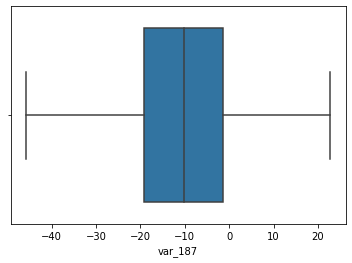

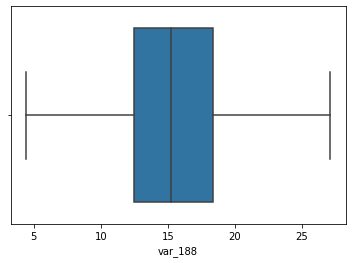

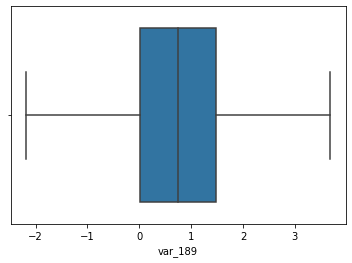

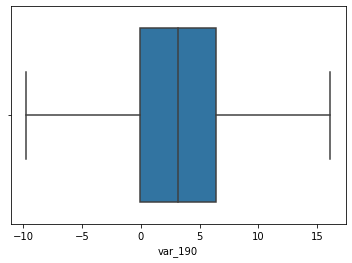

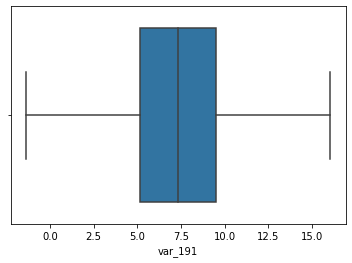

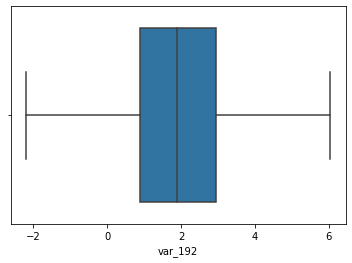

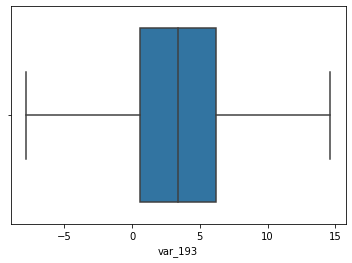

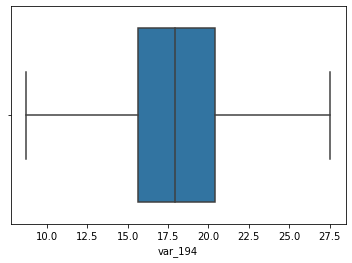

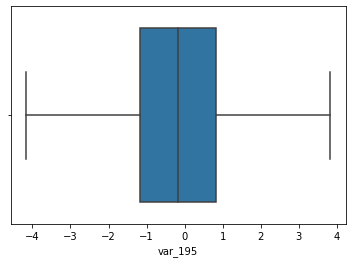

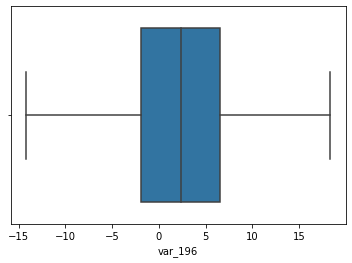

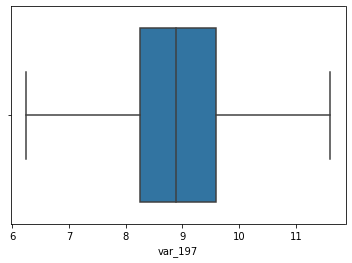

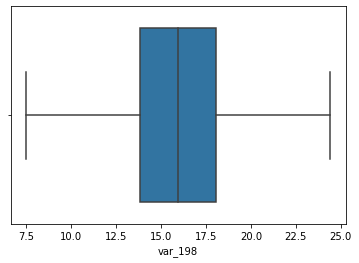

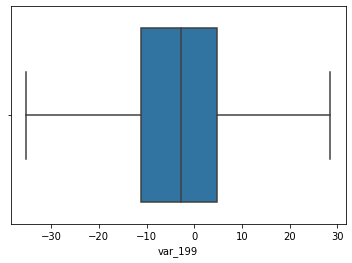

In [80]:
plt.figure(figsize=(8,3))
%matplotlib inline

for i, col in enumerate(df_train.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=df_train)

In [81]:
for i in df_train:
  Q1 =  df_train[i].quantile(0.25)
  Q3 = df_train[i].quantile(0.75)
  IQR = Q3 - Q1
  x= (df_train[(df_train[i] < Q1-1.5*IQR ) | (df_train[i] > Q3+1.5*IQR)][i]).shape
  maximum = Q3+1.5*IQR
  minimum = Q1-1.5*IQR
  print(x)                                 

(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)
(0,)


In the output, we can see that all the outliers were replaced from the maximum or minimum values.

#Feature Selection

In [0]:
df_train_final = pd.concat([target, df_train], axis=1)

In [83]:
cnames = []
for i in df_train:
  cnames.append(i)
print(cnames)
df_corr = df_train_final.loc[:,cnames]

['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', 'var_100'

**Correlation Matrix**

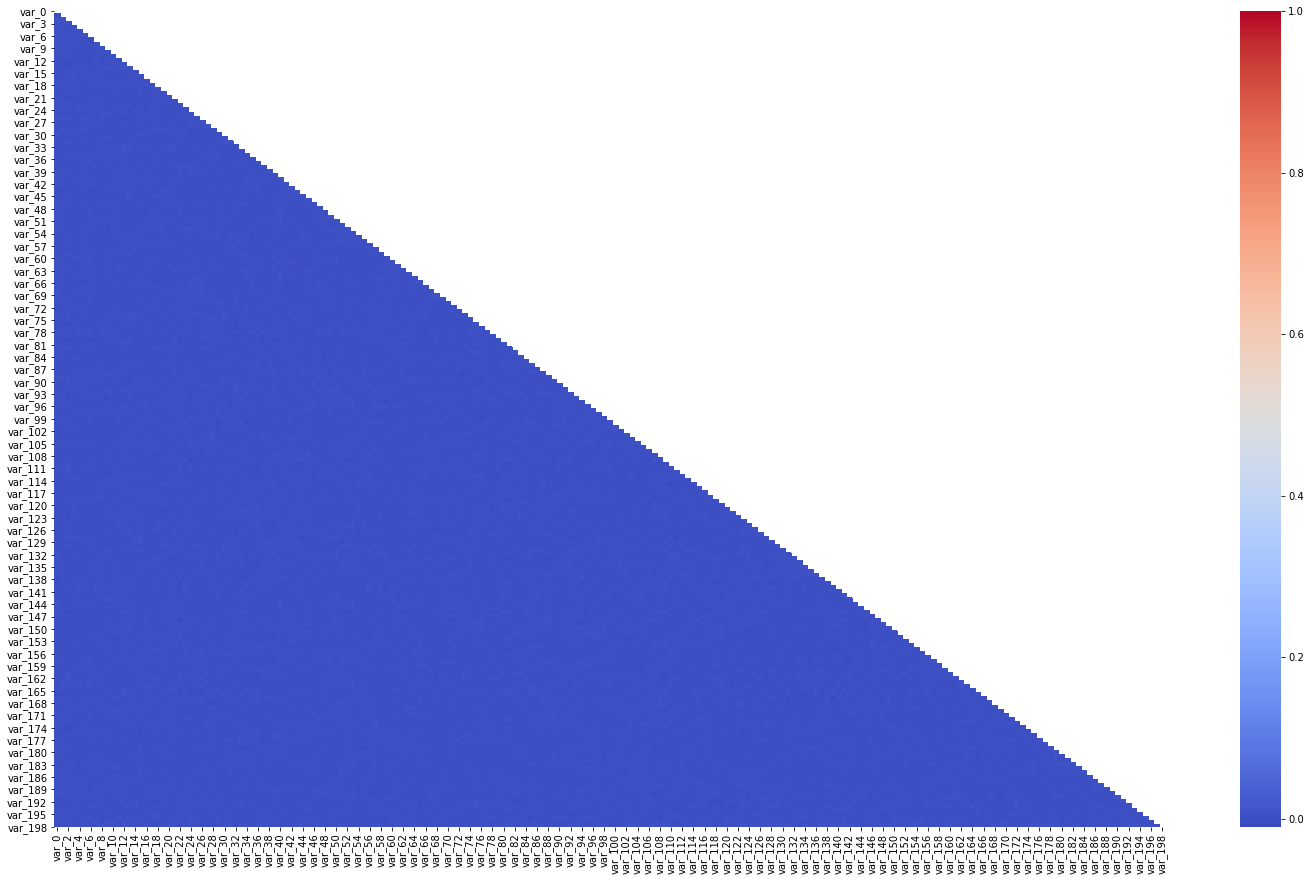

In [84]:
f , ax = plt.subplots(figsize = (25, 15))
corr = df_corr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

It is clear from above heat map. That no variable is dependent to each other.

**ANOVA Test**

In [85]:
for i in cnames:
    mod = ols("target" + '~' + i, data = df_train_final).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq        df           F         PR(>F)
var_0        49.646959       1.0  550.749071  1.264733e-121
Residual  18028.705021  199998.0         NaN            NaN
                sum_sq        df           F         PR(>F)
var_1        45.817526       1.0  508.160051  2.203099e-112
Residual  18032.534454  199998.0         NaN            NaN
                sum_sq        df           F         PR(>F)
var_2        56.437211       1.0  626.311328  5.179204e-138
Residual  18021.914769  199998.0         NaN            NaN
                sum_sq        df          F        PR(>F)
var_3         2.209272       1.0  24.443822  7.657022e-07
Residual  18076.142708  199998.0        NaN           NaN
                sum_sq        df          F    PR(>F)
var_4         2.155092       1.0  23.844295  0.000001
Residual  18076.196888  199998.0        NaN       NaN
                sum_sq        df           F        PR(>F)
var_5        17.348524       1.0  192.108384  1.154409e-43
Residu

**Deleting variables with P-value>0.5**

In [86]:
cnames_new=[]
del_col_names = []
for i in cnames:
    mod = ols("target" + '~' + i, data = df_train_final).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    #print(aov_table)
    
    if aov_table["PR(>F)"][0] > 0.05:
      del df_train_final[i]
      print(i)
      del_col_names.append(i)
    else:
      cnames_new.append(i)

var_7
var_10
var_17
var_27
var_30
var_38
var_39
var_41
var_96
var_98
var_100
var_103
var_117
var_124
var_126
var_136
var_158
var_161
var_185


In [87]:
df_train_final.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_9,var_11,var_12,var_13,var_14,var_15,var_16,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_28,var_29,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_40,var_42,var_43,var_44,var_45,var_46,...,var_157,var_159,var_160,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,-4.9200,5.7470,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,4.9306,5.9965,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,-5.2387,11.5767,12.0446,11.6418,-7.0170,5.9226,...,-13.1324,11.5423,15.4576,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.72020,-8.4051,9.0164,3.0657,14.3691,25.8398,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,3.1468,8.0851,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,5.0464,0.5481,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,-11.1147,9.8775,11.7842,1.2444,-47.3797,7.3718,...,-9.6953,10.6261,29.4846,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,10.03945,-5.5937,9.4878,-14.9100,9.4245,22.5441,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,-4.9193,5.9525,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,5.8463,6.1439,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,-13.5174,11.5283,12.0406,4.1006,-7.9078,11.1405,...,-1.7624,11.6041,13.2070,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.40130,-4.2935,9.3908,-13.2648,3.1545,23.0866,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,-5.8609,8.2450,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,5.9070,2.8407,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,-3.8294,11.7770,11.2834,8.0485,-24.6840,12.7404,...,-1.2155,12.3892,31.8833,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.69610,-3.7546,8.4117,1.8986,7.2601,-0.4639,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,6.2654,7.6784,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,5.9015,7.9352,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,-5.5963,11.9171,11.5111,6.9087,-65.4863,13.8657,...,-12.6068,8.0913,33.5107,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.17430,-7.6938,9.7685,4.8910,12.2198,11.8503,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
df_train = df_train_final

In [89]:
df_train.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_9,var_11,var_12,var_13,var_14,var_15,var_16,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_28,var_29,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_40,var_42,var_43,var_44,var_45,var_46,...,var_157,var_159,var_160,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,-4.9200,5.7470,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,4.9306,5.9965,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,-5.2387,11.5767,12.0446,11.6418,-7.0170,5.9226,...,-13.1324,11.5423,15.4576,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.72020,-8.4051,9.0164,3.0657,14.3691,25.8398,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,3.1468,8.0851,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,5.0464,0.5481,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,-11.1147,9.8775,11.7842,1.2444,-47.3797,7.3718,...,-9.6953,10.6261,29.4846,3.8208,15.8348,-5.0121,15.1345,3.2003,9.3192,3.8821,5.7999,5.5378,5.0988,22.0330,5.5134,30.2645,10.4968,-7.2352,16.5721,-7.3477,10.03945,-5.5937,9.4878,-14.9100,9.4245,22.5441,7.6543,-15.9319,13.3175,-0.3566,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,-4.9193,5.9525,-11.2648,14.1929,7.3124,7.5244,14.6472,7.6782,4.7011,20.4775,17.7559,18.1377,1.2145,3.5137,5.6777,13.2177,-7.9940,5.8463,6.1439,12.4858,-2.2871,19.0422,11.0449,4.1087,4.6974,6.9346,-13.5174,11.5283,12.0406,4.1006,-7.9078,11.1405,...,-1.7624,11.6041,13.2070,4.7086,5.7141,-1.0410,20.5092,3.2790,-5.5952,7.3176,5.7690,-7.0927,-3.9116,7.2569,-5.8234,25.6820,10.9202,-0.3104,8.8438,-9.7009,2.40130,-4.2935,9.3908,-13.2648,3.1545,23.0866,5.3745,-6.2660,10.1934,-0.8417,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,-5.8609,8.2450,2.8102,13.8463,11.9704,6.4569,14.8372,10.7430,15.9426,13.7257,20.3010,12.5579,6.8202,2.7229,12.1354,13.7367,0.8135,5.9070,2.8407,10.4407,-2.5731,6.1796,10.6093,-5.9158,8.1723,2.8521,-3.8294,11.7770,11.2834,8.0485,-24.6840,12.7404,...,-1.2155,12.3892,31.8833,7.2084,3.8899,-11.0882,17.2502,2.5881,-2.7018,0.5641,5.3430,-7.1541,-6.1920,18.2366,11.7134,14.7483,8.1013,11.8771,13.9552,-10.4701,5.69610,-3.7546,8.4117,1.8986,7.2601,-0.4639,7.9336,-12.8279,12.4124,1.8489,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,6.2654,7.6784,-12.1419,13.8481,7.8895,7.7894,15.0553,8.4871,6.5263,11.3152,21.4246,18.9608,10.1102,2.7142,14.2080,13.5433,3.1736,5.9015,7.9352,9.4668,-0.0083,19.3239,12.4057,0.6329,2.7922,5.8184,-5.5963,11.9171,11.5111,6.9087,-65.4863,13.8657,...,-12.6068,8.0913,33.5107,5.4663,18.2201,6.5769,21.2607,3.2304,-1.7759,3.1283,5.5518,1.4493,-2.6627,19.8056,2.3705,18.4685,16.3309,-3.3456,13.5261,1.7189,5.17430,-7.6938,9.7685,4.8910,12.2198,11.8503,6.4209,5.9270,16.0201,-0.2829,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
df_train_1 = df_train.copy()

Feature Scaling

**Analyzing Distribution of observations by using graph**

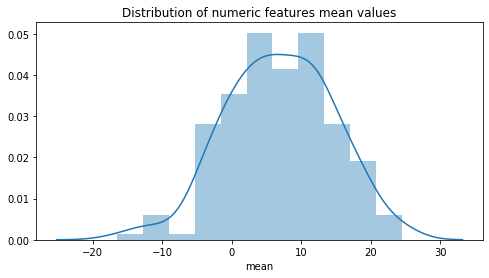

In [91]:
plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['mean'])
plt.title('Distribution of numeric features mean values')
plt.show()

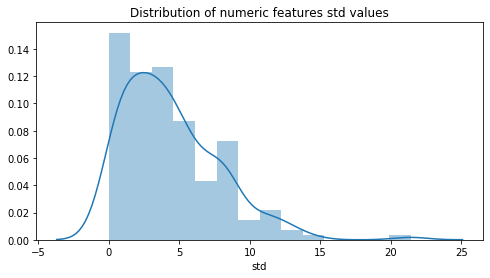

In [92]:
plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['std'])
plt.title('Distribution of numeric features std values')
plt.show()

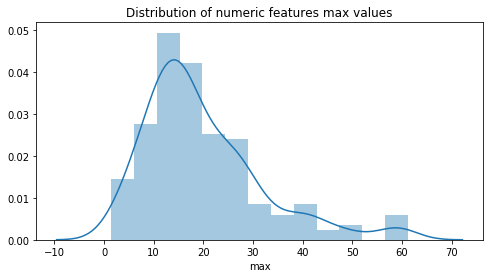

In [93]:
plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['max'])
plt.title('Distribution of numeric features max values')
plt.show()

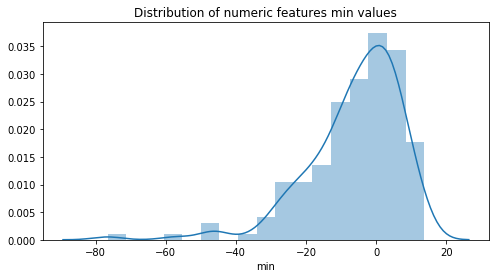

In [94]:
plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['min'])
plt.title('Distribution of numeric features min values')
plt.show()

**Normalization**

In [0]:
for i in cnames_new:
  #print(i)
  df_train[i]= (df_train[i] - df_train[i].min())/(df_train[i].max() - df_train[i].min())

**Analyzing Distribution of observations by using graph (After Normalization)**

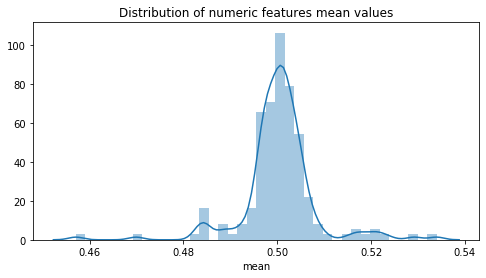

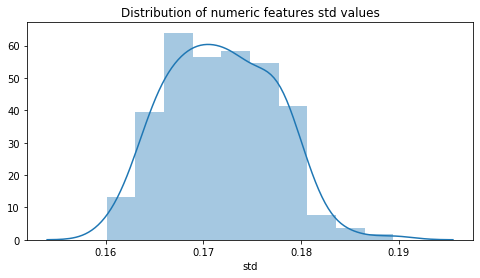

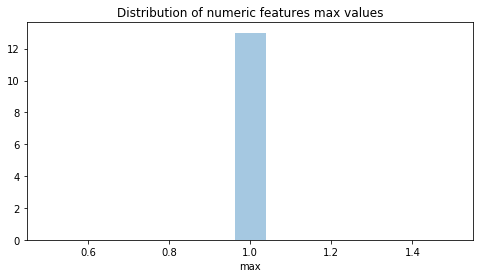

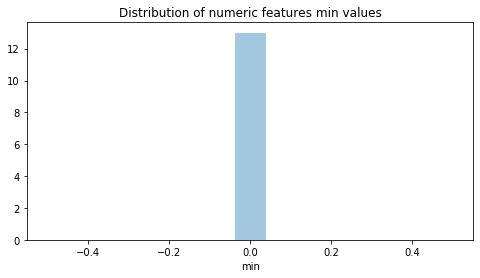

In [96]:
plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['mean'])
plt.title('Distribution of numeric features mean values')
plt.show()
##################################################################################

plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['std'])
plt.title('Distribution of numeric features std values')
plt.show()

###################################################################################

plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['max'])
plt.title('Distribution of numeric features max values')
plt.show()

###################################################################################

plt.figure(figsize=(8, 4))
sns.distplot(df_train.drop(['target'],axis=1).describe().loc['min'])
plt.title('Distribution of numeric features min values')
plt.show()


Now, we can clearly observe that data is now normalized.

# Preparing Model

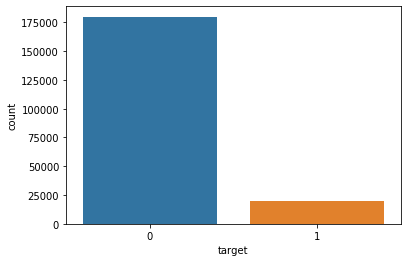

In [97]:
sns.countplot(x= "target", data = df_train)

We can clearly see that data is highly unbalanced.

# **Balancing the Data (Down-Sampling)**

In [98]:
minority_class_len = len(df_train[df_train["target"] == 1])
print(minority_class_len)
majority_class_indices = df_train[df_train["target"]== 0].index
print(majority_class_indices)
random_majority_indices = np.random.choice(majority_class_indices, minority_class_len, replace = False)
print(len(random_majority_indices))
minority_class_indices = df_train[df_train["target"]== 1].index
print(minority_class_indices)
under_sample_indices = np.concatenate([minority_class_indices, random_majority_indices])
under_sample = df_train.loc[under_sample_indices]

20098
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            199989, 199991, 199992, 199993, 199994, 199995, 199996, 199997,
            199998, 199999],
           dtype='int64', length=179902)
20098
Int64Index([    13,     29,     63,     65,     71,     72,     84,     99,
               119,    120,
            ...
            199877, 199892, 199897, 199923, 199953, 199966, 199976, 199981,
            199986, 199990],
           dtype='int64', length=20098)


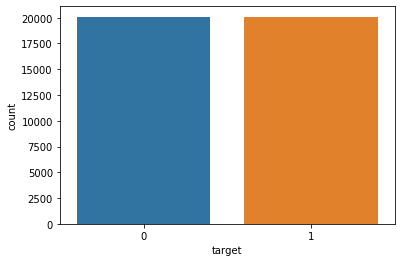

In [99]:
sns.countplot(x= "target", data = under_sample)

In [100]:
under_sample.shape

(40196, 182)

In [101]:
under_sample.tail()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_9,var_11,var_12,var_13,var_14,var_15,var_16,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_28,var_29,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_40,var_42,var_43,var_44,var_45,var_46,...,var_157,var_159,var_160,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
106839,0,0.280331,0.355132,0.437373,0.570489,0.871849,0.560046,0.373037,0.523811,0.486024,0.661040,0.818005,0.802599,0.521959,0.736901,0.480319,0.587048,0.484854,0.614761,0.672054,0.620299,0.425247,0.763898,0.507642,0.663079,0.735635,0.567213,0.584992,0.570759,0.475121,0.756397,0.463862,0.548688,0.518537,0.491023,0.574219,0.638470,0.410423,0.555527,0.453648,...,0.274261,0.379186,0.517529,0.344464,0.581625,0.324602,0.179023,0.679516,0.438386,0.434175,0.611954,0.521450,0.405625,0.422613,0.491567,0.765472,0.451191,0.704126,0.382223,0.180518,0.698726,0.099055,0.449003,0.331143,0.390900,0.402364,0.453116,0.380673,0.167540,0.513011,0.358787,0.710651,0.278145,0.451265,0.529179,0.527052,0.283203,0.377499,0.451292,0.306753
112035,0,0.630913,0.362999,0.366864,0.684592,0.333065,0.723885,0.734386,0.428939,0.511971,0.526729,0.400814,0.463895,0.654495,0.478196,0.385075,0.414353,0.426708,0.518589,0.762236,0.512212,0.457922,0.726334,0.565277,0.442713,0.420820,0.634434,0.706957,0.346825,0.397049,0.566358,0.493099,0.683556,0.361506,0.782332,0.325345,0.301302,0.590036,0.719431,0.444569,...,0.641544,0.316445,0.615877,0.698322,0.302673,0.580876,0.582496,0.307995,0.505108,0.489320,0.654908,0.387667,0.034928,0.422155,0.257192,0.474148,0.338227,0.409247,0.664750,0.755005,0.450011,0.371750,0.514326,0.564014,0.208533,0.360659,0.321836,0.725108,0.572656,0.322071,0.316061,0.902442,0.411112,0.509375,0.557680,0.605503,0.366923,0.320972,0.352999,0.729779
133563,0,0.462426,0.538842,0.396660,0.861667,0.646970,0.628081,0.712246,0.364324,0.455077,0.571155,0.387676,0.334316,0.697712,0.659535,0.795148,0.589291,0.414825,0.579494,0.652865,0.644047,0.256935,0.357541,0.505800,0.339874,0.680714,0.324955,0.511708,0.439137,0.345222,0.362115,0.387981,0.542835,0.510787,0.614833,0.659205,0.535757,0.725474,0.376613,0.453507,...,0.425094,0.472593,0.299642,0.337153,0.500907,0.552886,0.648057,0.331636,0.746909,0.815891,0.642332,0.263492,0.402642,0.422559,0.467527,0.644131,0.346121,0.454549,0.669637,0.311968,0.698454,0.714067,0.262522,0.479182,0.454814,0.369323,0.701296,0.479214,0.675350,0.194976,0.419811,0.344524,0.298172,0.535704,0.759879,0.482746,0.508071,0.831677,0.211064,0.404353
58581,0,0.939409,0.573757,0.449681,0.874135,0.335410,0.510331,0.482949,0.306975,0.353881,0.429622,0.546170,0.296578,0.642197,0.233141,0.360516,0.695466,0.759744,0.440615,0.489705,0.485064,0.312476,0.278575,0.688160,0.305794,0.506037,0.483154,0.689884,0.414391,0.406431,0.615408,0.845526,0.538576,0.721799,0.324814,0.364628,0.593001,0.654902,0.600206,0.149911,...,0.555062,0.475888,0.313377,0.679667,0.514029,0.621655,0.508600,0.593710,0.588559,0.430620,0.546769,0.514487,0.626123,0.445716,0.616068,0.725733,0.658728,0.429220,0.525511,0.280524,0.421615,0.544124,0.611258,0.256147,0.283402,0.481271,0.543490,0.505550,0.433704,0.583311,0.348164,0.531942,0.688528,0.131173,0.746321,0.766054,0.342743,0.641505,0.395260,0.549387
78524,0,0.337035,0.199874,0.339705,0.618713,0.613443,0.747174,0.740296,0.576743,0.257601,0.732123,0.419967,0.770420,0.301899,0.640776,0.367433,0.708966,0.810255,0.634476,0.433303,0.161860,0.429209,0.418740,0.638135,0.307738,0.340074,0.291699,0.715995,0.380566,0.812637,0.213178,0.480574,0.726880,0.605612,0.560034,0.456824,0.336191,0.696369,0.576180,0.278371,...,0.408612,0.858997,0.428332,0.318682,0.351021,0.376258,0.337921,0.455968,0.450688,0.826362,0.583035,0.574205,0.595471,0.839492,0.537028,0.678046,0.

**Splitting the under sampled data by using train_test_split**

In [0]:
X = under_sample.drop('target',axis=1).values
y = under_sample['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=69)
# print(df_train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

In [0]:
def print_metrices(y_test, y_pred):
  print("Confusion Matrix \n", pd.crosstab(pd.Series(y_test,name="Actual"), pd.Series(y_pred,name="    Predicted")), "\n")
  print("ROC AUC Score: \n", roc_auc_score(y_test, y_pred), "\n")
  print("Classification Report: \n",classification_report(y_test,y_pred.round()), "\n")


### **Applying Logistic Regression**

In [0]:
LR_model_under = LogisticRegression().fit(X_train, y_train)
LR_pred_under = LR_model_under.predict(X_test)

In [105]:
print_metrices(y_test, LR_pred_under)

Confusion Matrix 
     Predicted     0     1
Actual                   
0              3152   886
1               877  3125 

ROC AUC Score: 
 0.7807220089806508 

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      4038
           1       0.78      0.78      0.78      4002

    accuracy                           0.78      8040
   macro avg       0.78      0.78      0.78      8040
weighted avg       0.78      0.78      0.78      8040
 



#### **Applying XGBoost**

In [0]:
XGB_model_under = XGBClassifier()
XGB_model_under.fit(X_train, y_train)
XGB_pred_under = XGB_model_under.predict(X_test)

In [107]:
print_metrices(y_test, XGB_pred_under)

Confusion Matrix 
     Predicted     0     1
Actual                   
0              3180   858
1              1090  2912 

ROC AUC Score: 
 0.7575773777301542 

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.79      0.77      4038
           1       0.77      0.73      0.75      4002

    accuracy                           0.76      8040
   macro avg       0.76      0.76      0.76      8040
weighted avg       0.76      0.76      0.76      8040
 



### **Applying DecisionTreeClassifier**

In [0]:
DT_model_under = tree.DecisionTreeClassifier(criterion = "entropy").fit(X_train, y_train)
DT_pred_under = DT_model_under.predict(X_test)

In [109]:
print_metrices(y_test, DT_pred_under)

Confusion Matrix 
     Predicted     0     1
Actual                   
0              2365  1673
1              1637  2365 

ROC AUC Score: 
 0.5883202529493053 

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.59      0.59      4038
           1       0.59      0.59      0.59      4002

    accuracy                           0.59      8040
   macro avg       0.59      0.59      0.59      8040
weighted avg       0.59      0.59      0.59      8040
 



### **Applying RandomForestClassifier**

In [0]:
RF_model_under = RandomForestClassifier(n_estimators = 300).fit(X_train, y_train)
RF_pred_under = RF_model_under.predict(X_test)

In [111]:
print_metrices(y_test, RF_pred_under)

Confusion Matrix 
     Predicted     0     1
Actual                   
0              2999  1039
1               820  3182 

ROC AUC Score: 
 0.7688984259727492 

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76      4038
           1       0.75      0.80      0.77      4002

    accuracy                           0.77      8040
   macro avg       0.77      0.77      0.77      8040
weighted avg       0.77      0.77      0.77      8040
 



# **Balancing the Data (Up-Sampling)**

In [112]:
#Training data
from sklearn.model_selection import StratifiedKFold
X=df_train.drop(['target'],axis=1)
y=df_train['target']
#StratifiedKFold cross validator
cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
for train_index,valid_index in cv.split(X,y):
    X_train, X_test=X.iloc[train_index], X.iloc[valid_index]
    y_train, y_test=y.iloc[train_index], y.iloc[valid_index]
print('Shape of X_train :',X_train.shape)
print('Shape of X_test :',X_test.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_test :',y_test.shape)


Shape of X_train : (160001, 181)
Shape of X_test : (39999, 181)
Shape of y_train : (160001,)
Shape of y_test : (39999,)


In [113]:
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 143922, 1: 16079}

**Random sampling**

### **Upsampling using SMOTE**

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases. We have oversampled only training dataset, SMOTE is not applied on test dataset.

In [0]:
sm = SMOTE(random_state=42, ratio =1)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [115]:
unique, count = np.unique(y_train_smote, return_counts= True)
y_train_value_count = {k:v for (k,v) in zip(unique,count)}
y_train_value_count

{0: 143922, 1: 143922}

# **Applying LogisticRegression**

In [0]:
LR_model_smote = LogisticRegression().fit(X_train_smote, y_train_smote)
LR_pred_smote  = LR_model_smote.predict(X_test)

In [117]:
print_metrices(y_test.values, LR_pred_smote)

Confusion Matrix 
     Predicted      0     1
Actual                    
0              28510  7470
1                954  3065 

ROC AUC Score: 
 0.7775060887134084 

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     35980
           1       0.29      0.76      0.42      4019

    accuracy                           0.79     39999
   macro avg       0.63      0.78      0.65     39999
weighted avg       0.90      0.79      0.83     39999
 



### **Applying XGBoost**

In [0]:
XGB_model_smote = XGBClassifier()
XGB_model_smote.fit(X_train_smote, y_train_smote)
XGB_pred_smote = XGB_model_smote.predict(X_test.values)

In [119]:
print_metrices(y_test.values, XGB_pred_smote)

Confusion Matrix 
     Predicted      0     1
Actual                    
0              30293  5687
1               2479  1540 

ROC AUC Score: 
 0.6125599310722649 

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     35980
           1       0.21      0.38      0.27      4019

    accuracy                           0.80     39999
   macro avg       0.57      0.61      0.58     39999
weighted avg       0.85      0.80      0.82     39999
 



### **Applying DecisionTreeClassifier**

In [0]:
DT_model_smote = tree.DecisionTreeClassifier(criterion = "entropy").fit(X_train_smote, y_train_smote)
DT_pred_smote = DT_model_smote.predict(X_test)

In [121]:
print_metrices(y_test.values, DT_pred_smote)

Confusion Matrix 
     Predicted      0     1
Actual                    
0              26847  9133
1               2683  1336 

ROC AUC Score: 
 0.539292768051035 

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.75      0.82     35980
           1       0.13      0.33      0.18      4019

    accuracy                           0.70     39999
   macro avg       0.52      0.54      0.50     39999
weighted avg       0.83      0.70      0.76     39999
 



### **Applying RandomForestClassifier**

In [0]:
RF_model_smote = RandomForestClassifier(n_estimators = 42).fit(X_train_smote, y_train_smote)
RF_pred_smote = RF_model_smote.predict(X_test)

In [123]:
print_metrices(y_test.values, RF_pred_smote)

Confusion Matrix 
     Predicted      0    1
Actual                   
0              35450  530
1               3797  222 

ROC AUC Score: 
 0.5202536077589206 

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     35980
           1       0.30      0.06      0.09      4019

    accuracy                           0.89     39999
   macro avg       0.60      0.52      0.52     39999
weighted avg       0.84      0.89      0.86     39999
 



### **Finalizing Model**

 **We have seen that Logistic Regression performed well in both cases(undersample and oversample). But we will use the *Logistic Regression Model which was trained on oversampled data* because there are chances that during undersampling, we lost some important information about data**

# **Manipulating Test Data for prediction**

# Analysing Test Data

In [124]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,30.9641,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,39.3654,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,19.7251,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,22.8700,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [125]:
test.shape

(200000, 201)

In [126]:
test.columns

Index(['ID_code', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5',
       'var_6', 'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [127]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,0.371335,-3.268551,14.022662,8.540872,7.532703,14.573704,9.321669,-5.70445,15.265776,12.456675,13.298428,17.230598,4.299010,3.019707,10.567479,13.666970,-3.983721,-1.129536,5.530656,5.047247,-7.687695,10.404920,-0.524830,14.762686,11.434861,3.870130,2.213288,5.875048,10.647806,0.672667,...,24.146181,5.635300,5.360975,11.026376,-2.857328,19.320760,2.962821,-4.189133,4.930356,5.633716,-0.020824,-0.805148,19.779528,-0.666240,20.264135,11.635715,-2.776134,11.864538,-0.949318,2.582604,-2.722636,10.080827,0.651432,8.768929,12.719302,-3.963045,8.978800,-10.291919,15.366094,0.755673,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,5.508661,5.961443,0.190071,4.628712,2.255257,0.411592,2.544860,6.74646,7.846983,7.989812,5.884245,8.199877,2.844023,0.527951,3.771047,0.285454,5.945853,1.524765,0.785618,2.610078,7.971581,2.156324,2.588700,4.325727,0.541040,5.170614,3.120685,2.257235,4.260820,4.078592,...,10.876184,0.217936,1.426064,5.268894,5.457937,5.039303,0.370668,7.827428,3.086443,0.365750,4.417876,5.378492,8.678024,5.987419,7.141816,2.884821,7.557001,2.626556,8.570314,2.803890,5.225554,1.369546,8.961936,4.464461,9.316889,4.724641,3.206635,11.562352,3.929227,0.976123,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,-22.672400,-25.811800,13.424500,-4.741300,0.670300,13.203400,0.314300,-28.90690,-11.324200,-12.699400,-2.634600,-9.940600,-5.164000,1.390600,-0.731300,12.749600,-24.536100,-6.040900,2.842500,-4.421500,-34.054800,1.309200,-8.209000,1.691100,9.776400,-16.923800,-10.466800,-0.885100,-5.368300,-14.083700,...,-8.925700,4.910600,0.106200,-6.093700,-21.514000,3.667300,1.813100,-37.176400,-5.405700,4.291500,-15.593200,-20.393600,-11.796600,-21.342800,-2.485400,2.951200,-29.838400,5.025300,-29.118500,-7.767400,-20.610600,5.346000,-28.092800,-5.476800,-17.011400,-22.467000,-2.303800,-47.306400,4.429100,-2.511500,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.91190

In [0]:
df_test = test.copy()

In [0]:
del df_test["ID_code"]

# Preprocessing Test Data (Dropping columns in test dataset which we dropped in train dataset before training)

In [130]:
del_col_names

['var_7',
 'var_10',
 'var_17',
 'var_27',
 'var_30',
 'var_38',
 'var_39',
 'var_41',
 'var_96',
 'var_98',
 'var_100',
 'var_103',
 'var_117',
 'var_124',
 'var_126',
 'var_136',
 'var_158',
 'var_161',
 'var_185']

In [0]:
for i in del_col_names:
  del df_test[i]

In [0]:
cnames_test =df_test.columns.values.tolist()
#Normalisation
for i in cnames_test:
  #print(i)
  df_test[i]= (df_test[i] - df_test[i].min())/(df_test[i].max() - df_test[i].min())

In [133]:
df_test.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_9,var_11,var_12,var_13,var_14,var_15,var_16,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_28,var_29,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_40,var_42,var_43,var_44,var_45,var_46,var_47,...,var_157,var_159,var_160,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.491396,0.934286,0.647868,0.717967,0.563676,0.563885,0.596918,0.616146,0.675517,0.503871,0.433479,0.193085,0.488906,0.499769,0.433231,0.535385,0.599931,0.182752,0.501181,0.351645,0.460870,0.292305,0.741607,0.396023,0.510592,0.472405,0.438002,0.677813,0.402237,0.451474,0.638855,0.441655,0.342496,0.371403,0.522652,0.620632,0.595726,0.364106,0.542627,0.825126,...,0.535986,0.490773,0.202807,0.369151,0.355905,0.386338,0.578119,0.307936,0.639381,0.478060,0.338009,0.612012,0.586029,0.626795,0.734623,0.455691,0.550770,0.588646,0.346891,0.412799,0.460730,0.464568,0.579146,0.223594,0.304281,0.788003,0.482892,0.334892,0.361268,0.662863,0.346499,0.745496,0.168422,0.477313,0.233148,0.780223,0.613081,0.745210,0.445426,0.456290
1,0.376861,0.667159,0.547072,0.395628,0.351853,0.527653,0.624899,0.282491,0.255995,0.598378,0.547435,0.277381,0.343597,0.378440,0.393171,0.805622,0.265738,0.425852,0.228031,0.542616,0.284040,0.689340,0.407570,0.508048,0.510111,0.426943,0.560743,0.477815,0.495471,0.249282,0.454114,0.730431,0.250171,0.864663,0.361001,0.584284,0.308838,0.299294,0.611544,0.435053,...,0.742359,0.595948,0.544818,0.354986,0.575641,0.325059,0.355105,0.584828,0.801200,0.611066,0.416235,0.456885,0.324333,0.639640,0.387266,0.287051,0.392958,0.592638,0.209865,0.433778,0.594388,0.607466,0.764303,0.314325,0.364835,0.687696,0.588663,0.544543,0.469335,0.555119,0.717218,0.587858,0.377335,0.741635,0.333622,0.569846,0.417179,0.606236,0.628698,0.274352
2,0.239172,0.191796,0.475918,0.537077,0.452813,0.834554,0.440118,0.585037,0.606615,0.534710,0.199284,0.324887,0.724639,0.388962,0.561110,0.647567,0.696333,0.435063,0.388961,0.516036,0.386076,0.242165,0.442603,0.239824,0.786983,0.451950,0.463742,0.746454,0.748157,0.632963,0.684196,0.616997,0.455698,0.305018,0.139362,0.799719,0.467239,0.695839,0.436524,0.383346,...,0.849497,0.472790,0.659563,0.318170,0.313624,0.628027,0.288782,0.545629,0.571973,0.325597,0.703165,0.479477,0.581173,0.439783,0.452536,0.660622,0.763278,0.381140,0.708573,0.345384,0.560044,0.506540,0.368420,0.447949,0.610521,0.675904,0.300854,0.638216,0.290721,0.587050,0.387344,0.700735,0.468998,0.467990,0.193832,0.744399,0.228884,0.146114,0.667101,0.241644
3,0.377177,0.561688,0.590920,0.501147,0.318535,0.687271,0.447462,0.679433,0.475497,0.487186,0.499483,0.692402,0.576092,0.590380,0.570175,0.267674,0.710116,0.494716,0.392153,0.423537,0.784040,0.590573,0.753303,0.672296,0.429825,0.633830,0.453941,0.697413,0.309231,0.298170,0.366061,0.701960,0.321426,0.578957,0.769826,0.406030,0.424556,0.498000,0.621826,0.769103,...,0.562466,0.609295,0.391315,0.354015,0.408164,0.312460,0.635620,0.344721,0.683590,0.622116,0.510076,0.702781,0.633092,0.217861,0.801131,0.376524,0.452388,0.485628,0.595054,0.634711,0.406198,0.869023,0.514162,0.604892,0.342731,0.409399,0.233881,0.388346,0.368857,0.607441,0.686848,0.600497,0.440591,0.516235,0.312664,0.854102,0.599396,0.501114,0.322375,0.523223
4,0.520319,0.610381,0.719749,0.590456,0.342955,0.426075,0.762902,0.659735,0.429034,0.529062,0.538211,0.520318,0.288718,0.530987,0.677080,0.583780,0.550573,0.122073,0.457587,0.622671,0.608393,0.585579,0.612465,0.872775,0.424218,0.658314,0.512848,0.227039,0.575315,0.606141,0.508107,0.624823,0.592651,0.394356,0.601457,0.723533,0.739275,0.673990,0.747760,0.661549,...,0.284881,0.606471,0.434268,0.595728,0.581669,0.285498,0.675573,0.591611,0.547634,0.544859,0.710878,0.431240,0.475456,0.445692,0.584193

# **Predict Using Logistic Regression Model trained on oversampled data**

In [0]:
target_test = LR_model_smote.predict(df_test)


In [0]:
df_test["target"] = target_test

In [0]:
test_predicted = pd.concat([test, df_test["target"]], axis=1)

In [137]:
test_predicted.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,...,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,1
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,...,5.6723,3.6873,13.0429,-10.6572,15.5134,3.2185,9.0535,7.0535,5.3924,-0.7720,-8.1783,29.9227,-5.6274,10.5018,9.6083,-0.4935,8.1696,-4.3605,5.2110,0.4087,12.0030,-10.3812,5.8496,25.1958,-8.8468,11.8263,-8.7112,15.9072,0.9812,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760,1
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,-4.7057,-3.0422,13.6751,3.8183,10.8535,14.2126,9.8837,2.6541,21.2181,20.8163,12.4666,12.3696,4.7473,2.7936,5.2189,13.5670,-15.4246,-0.1655,7.2633,3.4310,-9.1508,9.7320,3.1062,22.3076,11.9593,9.9255,4.0702,4.9934,8.0667,...,5.5228,3.3159,4.3324,-0.5382,13.3009,3.1243,-4.1731,1.2330,6.1513,-0.0391,1.4950,16.8874,-2.9787,27.4035,15.8819,-10.9660,15.6415,-9.4056,4.4611,-3.0835,8.5549,-2.8517,13.4770,24.4721,-3.4824,4.9178,-2.0720,11.5390,1.1821,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794,1
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,0.0095,-5.0659,14.0526,13.5010,8.7660,14.7352,10.0383,-15.3508,2.1273,21.4797,14.5372,12.5527,2.9707,4.2398,13.7796,14.1408,1.0061,-1.3479,5.2570,6.5911,6.2161,9.5540,2.3628,10.2124,10.8047,-2.5588,6.0720,3.2613,16.5632,...,5.3882,3.6775,7.4753,-11.0780,24.8712,2.6415,2.2673,7.2788,5.6406,7.2048,3.4504,2.4130,11.1674,14.5499,10.6151,-5.7922,13.9407,7.1078,1.1019,9.4590,9.8243,5.9917,5.1634,8.1154,3.6638,3.3102,-19.7819,13.4499,1.3104,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108,1
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,5.1025,-3.2827,14.1013,8.9672,4.7276,14.5811,11.8615,3.1480,18.0126,13.8006,1.6026,16.3059,6.7954,3.6015,13.6569,13.8807,8.6228,-2.2654,5.2255,7.0165,-15.6961,10.6239,-4.7674,17.5447,11.8668,3.0154,4.2546,6.7601,5.9613,...,5.6688,6.1159,13.2433,-11.9785,26.2040,3.2348,-5.5775,5.7036,6.1717,-1.6039,-2.4866,17.2728,2.3640,14.0037,12.9165,-12.0311,10.1161,-8.7562,6.0889,-1.3620,10.3559,-7.4915,9.4588,3.9829,5.8580,8.3635,-24.8254,11.4928,1.6321,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846,1


In [138]:
test_predicted["target"].value_counts()

1    114030
0     85970
Name: target, dtype: int64

In [0]:
# #save output results 
test_predicted.to_csv("santander_test.csv", index = False)

In [141]:
# from google.colab import files 
# files.download('santander_test.csv')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 32882, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil